# 🔍 Comprehensive Exploratory Data Analysis
## Retail Sales Data Analysis

This notebook provides a thorough exploratory analysis of retail sales data including:
- **PDV (Point of Sale)** data with store locations and categories
- **Transaction** data with sales records and financial metrics
- **Product** data with categories, brands, and descriptions

Let's dive into understanding our data structure, quality, and patterns.

In [1]:
# Install required dependencies for this notebook
%pip install pandas numpy matplotlib seaborn plotly pyarrow

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
%cd Users/daniel.sant.salles

/mnt/batch/tasks/shared/LS_root/mounts/clusters/memoryman/code/Users/daniel.sant.salles


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. 📁 Load and Inspect Datasets

First, let's load all three datasets and understand their basic structure.

In [3]:
# Load the three main datasets
import os

# Dataset file paths
data_dir = './data'
pdv_file = 'part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet'
transactions_file = 'part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet'
products_file = 'part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet'

# Load datasets
try:
    df_pdv = pd.read_parquet(os.path.join(data_dir, pdv_file))
    print(f"✅ PDV dataset loaded: {df_pdv.shape}")
    
    df_transactions = pd.read_parquet(os.path.join(data_dir, transactions_file))
    print(f"✅ Transactions dataset loaded: {df_transactions.shape}")
    
    df_products = pd.read_parquet(os.path.join(data_dir, products_file))
    print(f"✅ Products dataset loaded: {df_products.shape}")
    
except Exception as e:
    print(f"❌ Error loading datasets: {e}")

✅ PDV dataset loaded: (14419, 4)
✅ Transactions dataset loaded: (6560698, 11)
✅ Products dataset loaded: (7092, 8)


In [16]:
# Display basic information about each dataset
datasets = {
    'PDV': df_pdv,
    'Transactions': df_transactions,
    'Products': df_products
}

for name, df in datasets.items():
    print(f"\n{'='*50}")
    print(f"📊 {name.upper()} DATASET OVERVIEW")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nData Types:")
    print(df.dtypes)
    print(f"\nFirst 3 rows:")
    display(df.head(3))


📊 PDV DATASET OVERVIEW
Shape: (14419, 4)
Columns: ['pdv', 'premise', 'categoria_pdv', 'zipcode']

Data Types:
pdv              object
premise          object
categoria_pdv    object
zipcode           int32
dtype: object

First 3 rows:


,pdv,premise,categoria_pdv,zipcode
0,2204965430669363375,On Premise,Mexican Rest,30741
1,5211957289528622910,On Premise,Hotel/Motel,80011
2,9024493554530757353,Off Premise,Convenience,80751



📊 TRANSACTIONS DATASET OVERVIEW
Shape: (6560698, 11)
Columns: ['internal_store_id', 'internal_product_id', 'distributor_id', 'transaction_date', 'reference_date', 'quantity', 'gross_value', 'net_value', 'gross_profit', 'discount', 'taxes']

Data Types:
internal_store_id       object
internal_product_id     object
distributor_id          object
transaction_date        object
reference_date          object
quantity               float64
gross_value            float64
net_value              float64
gross_profit           float64
discount               float64
taxes                  float64
dtype: object

First 3 rows:


,internal_store_id,internal_product_id,distributor_id,transaction_date,reference_date,quantity,gross_value,net_value,gross_profit,discount,taxes
0,7384367747233276219,328903483604537190,9,2022-07-13,2022-07-01,1.0,38.125,37.890625,10.042625,3.95,0.234375
1,3536908514005606262,5418855670645487653,5,2022-03-21,2022-03-01,6.0,107.250,106.440002,24.732002,17.10,0.810000
2,3138231730993449825,1087005562675741887,6,2022-09-06,2022-09-01,3.0,56.625,56.220001,14.124002,5.25,0.405000



📊 PRODUCTS DATASET OVERVIEW
Shape: (7092, 8)
Columns: ['produto', 'categoria', 'descricao', 'tipos', 'label', 'subcategoria', 'marca', 'fabricante']

Data Types:
produto         object
categoria       object
descricao       object
tipos           object
label           object
subcategoria    object
marca           object
fabricante      object
dtype: object

First 3 rows:


,produto,categoria,descricao,tipos,label,subcategoria,marca,fabricante
0,2282334733936076502,Distilled Spirits,JOSEPH CARTRON CAFÉ LIQUEUR,Distilled Spirits,Core,Liqueurs & Cordials,Joseph Cartron Cafe,Spiribam
1,6091840953834683482,Distilled Spirits,SPRINGBANK 18 YEAR SINGLE MALT 700ML,Distilled Spirits,Specialty,Scotch Whisky,Springbank 18 Year Single Malt,Pacific Edge Wine & Spirits
2,1968645851245092408,Distilled Spirits,J BRANDT TRIPLE SEC 12/750ML 30PF,Distilled Spirits,Private Label,Liqueurs & Cordials,J Brandt Triple Sec,Sazerac Spirits


In [5]:
# 🔍 Analyze PDV x Product Combinations
print("📊 PDV x PRODUCT COMBINATIONS ANALYSIS")
print("="*50)

# Check unique PDVs and Products
unique_pdvs = df_pdv['pdv'].nunique()
unique_products = df_products['produto'].nunique()
print(f"📍 Total unique PDVs: {unique_pdvs:,}")
print(f"🛍️ Total unique Products: {unique_products:,}")
print(f"🔢 Theoretical maximum combinations: {unique_pdvs * unique_products:,}")

# Check actual combinations in transaction data
unique_store_product_combinations = df_transactions[['internal_store_id', 'internal_product_id']].drop_duplicates()
actual_combinations = len(unique_store_product_combinations)
print(f"\n✅ Actual PDV x Product combinations in transactions: {actual_combinations:,}")

# Calculate coverage
theoretical_max = unique_pdvs * unique_products
coverage_percentage = (actual_combinations / theoretical_max) * 100
print(f"📈 Coverage percentage: {coverage_percentage:.2f}%")

# Check if transaction store/product IDs match the PDV/Product datasets
pdv_ids_in_transactions = df_transactions['internal_store_id'].unique()
product_ids_in_transactions = df_transactions['internal_product_id'].unique()

print(f"\n🔍 TRANSACTION DATA ANALYSIS:")
print(f"Unique store IDs in transactions: {len(pdv_ids_in_transactions):,}")
print(f"Unique product IDs in transactions: {len(product_ids_in_transactions):,}")

# Check if transaction IDs match with PDV/Product master data
pdv_match = set(pdv_ids_in_transactions).intersection(set(df_pdv['pdv'].astype(str)))
product_match = set(product_ids_in_transactions).intersection(set(df_products['produto'].astype(str)))

print(f"\n🔗 MATCHING ANALYSIS:")
print(f"Store IDs matching between transactions and PDV data: {len(pdv_match):,}")
print(f"Product IDs matching between transactions and Product data: {len(product_match):,}")

# Display some sample combinations
print(f"\n📋 Sample PDV x Product combinations:")
sample_combinations = unique_store_product_combinations.head(10)
for idx, row in sample_combinations.iterrows():
    print(f"  Store: {row['internal_store_id']} | Product: {row['internal_product_id']}")

📊 PDV x PRODUCT COMBINATIONS ANALYSIS
📍 Total unique PDVs: 14,419
🛍️ Total unique Products: 7,092
🔢 Theoretical maximum combinations: 102,259,548

✅ Actual PDV x Product combinations in transactions: 1,044,310
📈 Coverage percentage: 1.02%

🔍 TRANSACTION DATA ANALYSIS:
Unique store IDs in transactions: 15,086
Unique product IDs in transactions: 7,092

🔗 MATCHING ANALYSIS:
Store IDs matching between transactions and PDV data: 14,419
Product IDs matching between transactions and Product data: 7,092

📋 Sample PDV x Product combinations:
  Store: 7384367747233276219 | Product: 328903483604537190
  Store: 3536908514005606262 | Product: 5418855670645487653
  Store: 3138231730993449825 | Product: 1087005562675741887
  Store: 3681167389484217654 | Product: 1401422983880045188
  Store: 7762413312337359369 | Product: 6614994347738381720
  Store: 5871504315270136638 | Product: 3553055402616033444
  Store: 1027356552181929439 | Product: 576514643033029430
  Store: 6652651222667566690 | Product: 281

In [6]:
# 📊 Additional Analysis: Combination Distribution
print("\n📊 DETAILED COMBINATION ANALYSIS")
print("="*50)

# Analyze distribution of products per store
products_per_store = df_transactions.groupby('internal_store_id')['internal_product_id'].nunique()
print(f"📈 Products per store statistics:")
print(f"  Average products per store: {products_per_store.mean():.1f}")
print(f"  Median products per store: {products_per_store.median():.1f}")
print(f"  Min products per store: {products_per_store.min()}")
print(f"  Max products per store: {products_per_store.max()}")

# Analyze distribution of stores per product
stores_per_product = df_transactions.groupby('internal_product_id')['internal_store_id'].nunique()
print(f"\n🏪 Stores per product statistics:")
print(f"  Average stores per product: {stores_per_product.mean():.1f}")
print(f"  Median stores per product: {stores_per_product.median():.1f}")
print(f"  Min stores per product: {stores_per_product.min()}")
print(f"  Max stores per product: {stores_per_product.max()}")

# Note about the data discrepancy
print(f"\n⚠️  DATA NOTES:")
print(f"  • Transaction data has {len(pdv_ids_in_transactions):,} unique store IDs")
print(f"  • PDV master data has {unique_pdvs:,} unique PDV IDs")
print(f"  • {len(pdv_ids_in_transactions) - len(pdv_match):,} store IDs in transactions don't match PDV master data")
print(f"  • All {len(product_ids_in_transactions):,} product IDs in transactions match the product master data")

print(f"\n🎯 FINAL ANSWER:")
print(f"**Total PDV x Product combinations: {actual_combinations:,}**")


📊 DETAILED COMBINATION ANALYSIS
📈 Products per store statistics:
  Average products per store: 69.2
  Median products per store: 29.0
  Min products per store: 1
  Max products per store: 1602

🏪 Stores per product statistics:
  Average stores per product: 147.3
  Median stores per product: 17.0
  Min stores per product: 1
  Max stores per product: 6788

⚠️  DATA NOTES:
  • Transaction data has 15,086 unique store IDs
  • PDV master data has 14,419 unique PDV IDs
  • 667 store IDs in transactions don't match PDV master data
  • All 7,092 product IDs in transactions match the product master data

🎯 FINAL ANSWER:
**Total PDV x Product combinations: 1,044,310**


## 2. 🔍 Data Quality Assessment

Let's examine data quality issues including missing values, duplicates, and data inconsistencies.

In [14]:
def assess_data_quality(df, dataset_name):
    """Comprehensive data quality assessment"""
    print(f"\n{'='*60}")
    print(f"🔍 DATA QUALITY ASSESSMENT: {dataset_name.upper()}")
    print(f"{'='*60}")
    
    # Basic info
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Missing values
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    }).sort_values('Missing Count', ascending=False)
    
    print(f"\n📊 Missing Values:")
    print(missing_df[missing_df['Missing Count'] > 0])
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n🔄 Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    # Data type summary
    print(f"\n📋 Data Types Summary:")
    print(df.dtypes.value_counts())
    
    return missing_df

# Assess each dataset
for name, df in datasets.items():
    assess_data_quality(df, name)


🔍 DATA QUALITY ASSESSMENT: PDV
Dataset shape: (14419, 4)
Memory usage: 2.95 MB

📊 Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

🔄 Duplicate rows: 0 (0.00%)

📋 Data Types Summary:
object    3
int32     1
dtype: int64

🔍 DATA QUALITY ASSESSMENT: TRANSACTIONS
Dataset shape: (6560698, 11)
Memory usage: 2113.45 MB

📊 Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

🔄 Duplicate rows: 0 (0.00%)

📋 Data Types Summary:
float64    6
object     5
dtype: int64

🔍 DATA QUALITY ASSESSMENT: PRODUCTS
Dataset shape: (7092, 8)
Memory usage: 3.95 MB

📊 Missing Values:
              Missing Count  Missing Percentage
label                  1473           20.769882
subcategoria             32            0.451213

🔄 Duplicate rows: 0 (0.00%)

📋 Data Types Summary:
object    8
dtype: int64


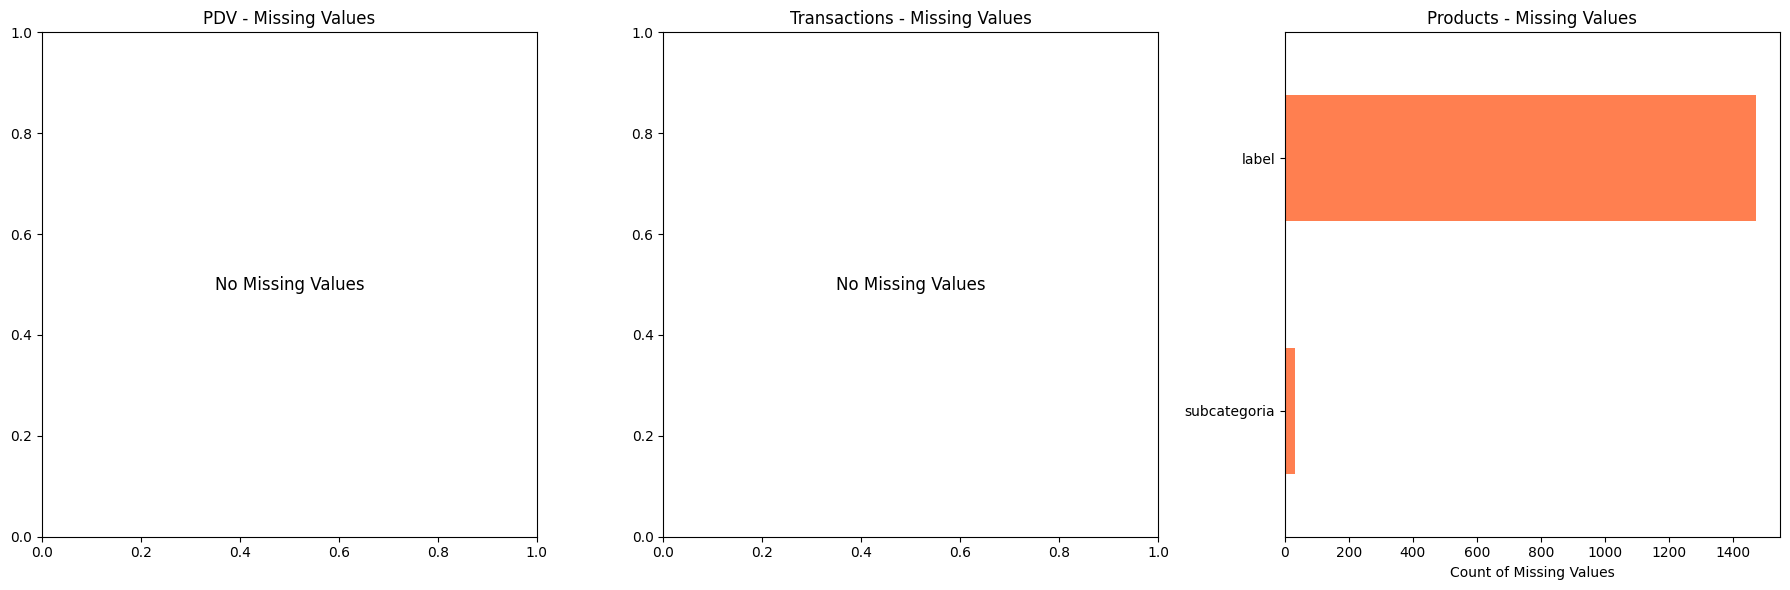

In [15]:
# Visualize missing data patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (name, df) in enumerate(datasets.items()):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=True)
    
    if len(missing_data) > 0:
        missing_data.plot(kind='barh', ax=axes[idx], color='coral')
        axes[idx].set_title(f'{name} - Missing Values')
        axes[idx].set_xlabel('Count of Missing Values')
    else:
        axes[idx].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                      transform=axes[idx].transAxes, fontsize=12)
        axes[idx].set_title(f'{name} - Missing Values')

plt.tight_layout()
plt.show()

## 3. 🔗 Dataset Relationships Analysis

Let's analyze how the three datasets relate to each other and identify linking keys.

In [16]:
# Analyze potential relationships between datasets
print("🔗 DATASET RELATIONSHIP ANALYSIS")
print("="*50)

# Check common column patterns that might be linking keys
print("\n📋 Column Analysis:")
print(f"PDV columns: {list(df_pdv.columns)}")
print(f"Transactions columns: {list(df_transactions.columns)}")
print(f"Products columns: {list(df_products.columns)}")

# Look for potential linking keys
print("\n🔑 Potential Linking Keys:")

# Check if there are matching patterns between datasets
pdv_cols = set(df_pdv.columns)
trans_cols = set(df_transactions.columns)
prod_cols = set(df_products.columns)

print(f"PDV ∩ Transactions: {pdv_cols & trans_cols}")
print(f"PDV ∩ Products: {pdv_cols & prod_cols}")
print(f"Transactions ∩ Products: {trans_cols & prod_cols}")
print(f"All three datasets: {pdv_cols & trans_cols & prod_cols}")

🔗 DATASET RELATIONSHIP ANALYSIS

📋 Column Analysis:
PDV columns: ['pdv', 'premise', 'categoria_pdv', 'zipcode']
Transactions columns: ['internal_store_id', 'internal_product_id', 'distributor_id', 'transaction_date', 'reference_date', 'quantity', 'gross_value', 'net_value', 'gross_profit', 'discount', 'taxes']
Products columns: ['produto', 'categoria', 'descricao', 'tipos', 'label', 'subcategoria', 'marca', 'fabricante']

🔑 Potential Linking Keys:
PDV ∩ Transactions: set()
PDV ∩ Products: set()
Transactions ∩ Products: set()
All three datasets: set()


In [17]:
# Analyze unique value counts for potential keys
def analyze_potential_keys(df, dataset_name):
    print(f"\n📊 {dataset_name} - Unique Value Analysis:")
    for col in df.columns:
        unique_count = df[col].nunique()
        unique_ratio = unique_count / len(df)
        print(f"  {col}: {unique_count:,} unique values ({unique_ratio:.2%})")

for name, df in datasets.items():
    analyze_potential_keys(df, name)


📊 PDV - Unique Value Analysis:
  pdv: 14,419 unique values (100.00%)
  premise: 2 unique values (0.01%)
  categoria_pdv: 54 unique values (0.37%)
  zipcode: 788 unique values (5.47%)

📊 Transactions - Unique Value Analysis:
  internal_store_id: 15,086 unique values (0.23%)
  internal_product_id: 7,092 unique values (0.11%)
  distributor_id: 8 unique values (0.00%)
  transaction_date: 365 unique values (0.01%)
  reference_date: 12 unique values (0.00%)
  quantity: 16,449 unique values (0.25%)
  gross_value: 173,883 unique values (2.65%)
  net_value: 216,337 unique values (3.30%)
  gross_profit: 363,451 unique values (5.54%)
  discount: 121,528 unique values (1.85%)
  taxes: 12,531 unique values (0.19%)

📊 Products - Unique Value Analysis:
  produto: 7,092 unique values (100.00%)
  categoria: 7 unique values (0.10%)
  descricao: 7,092 unique values (100.00%)
  tipos: 22 unique values (0.31%)
  label: 14 unique values (0.20%)
  subcategoria: 42 unique values (0.59%)
  marca: 4,221 unique

## 4. 💰 Sales Transaction Analysis

Let's dive deep into transaction patterns, quantities, and values.

In [18]:
# Focus on transactions dataset for sales analysis
print("💰 SALES TRANSACTION ANALYSIS")
print("="*50)

# Basic transaction statistics
if 'quantity' in df_transactions.columns:
    print(f"\n📊 Quantity Statistics:")
    print(df_transactions['quantity'].describe())

# Check for value-related columns
value_columns = [col for col in df_transactions.columns if 'value' in col.lower() or 
                'profit' in col.lower() or 'discount' in col.lower() or 'tax' in col.lower()]

print(f"\n💰 Financial Columns Found: {value_columns}")

for col in value_columns:
    if col in df_transactions.columns:
        print(f"\n{col} Statistics:")
        print(df_transactions[col].describe())

💰 SALES TRANSACTION ANALYSIS

📊 Quantity Statistics:
count    6.560698e+06
mean     8.125893e+00
std      8.049387e+01
min     -1.530000e+03
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      9.423000e+04
Name: quantity, dtype: float64

💰 Financial Columns Found: ['gross_value', 'net_value', 'gross_profit', 'discount', 'taxes']

gross_value Statistics:
count    6.560698e+06
mean     1.227512e+02
std      8.664265e+02
min     -4.267290e+04
25%      2.803500e+01
50%      4.210000e+01
75%      9.200000e+01
max      6.041739e+05
Name: gross_value, dtype: float64

net_value Statistics:
count    6.560698e+06
mean     1.191233e+02
std      8.651757e+02
min     -3.984800e+04
25%      2.711032e+01
50%      4.077048e+01
75%      8.787900e+01
max      6.041739e+05
Name: net_value, dtype: float64

gross_profit Statistics:
count    6.560698e+06
mean     2.193092e+01
std      2.326470e+02
min     -2.743960e+05
25%      7.140242e+00
50%      1.051024e+01
75%      2.173200e+01


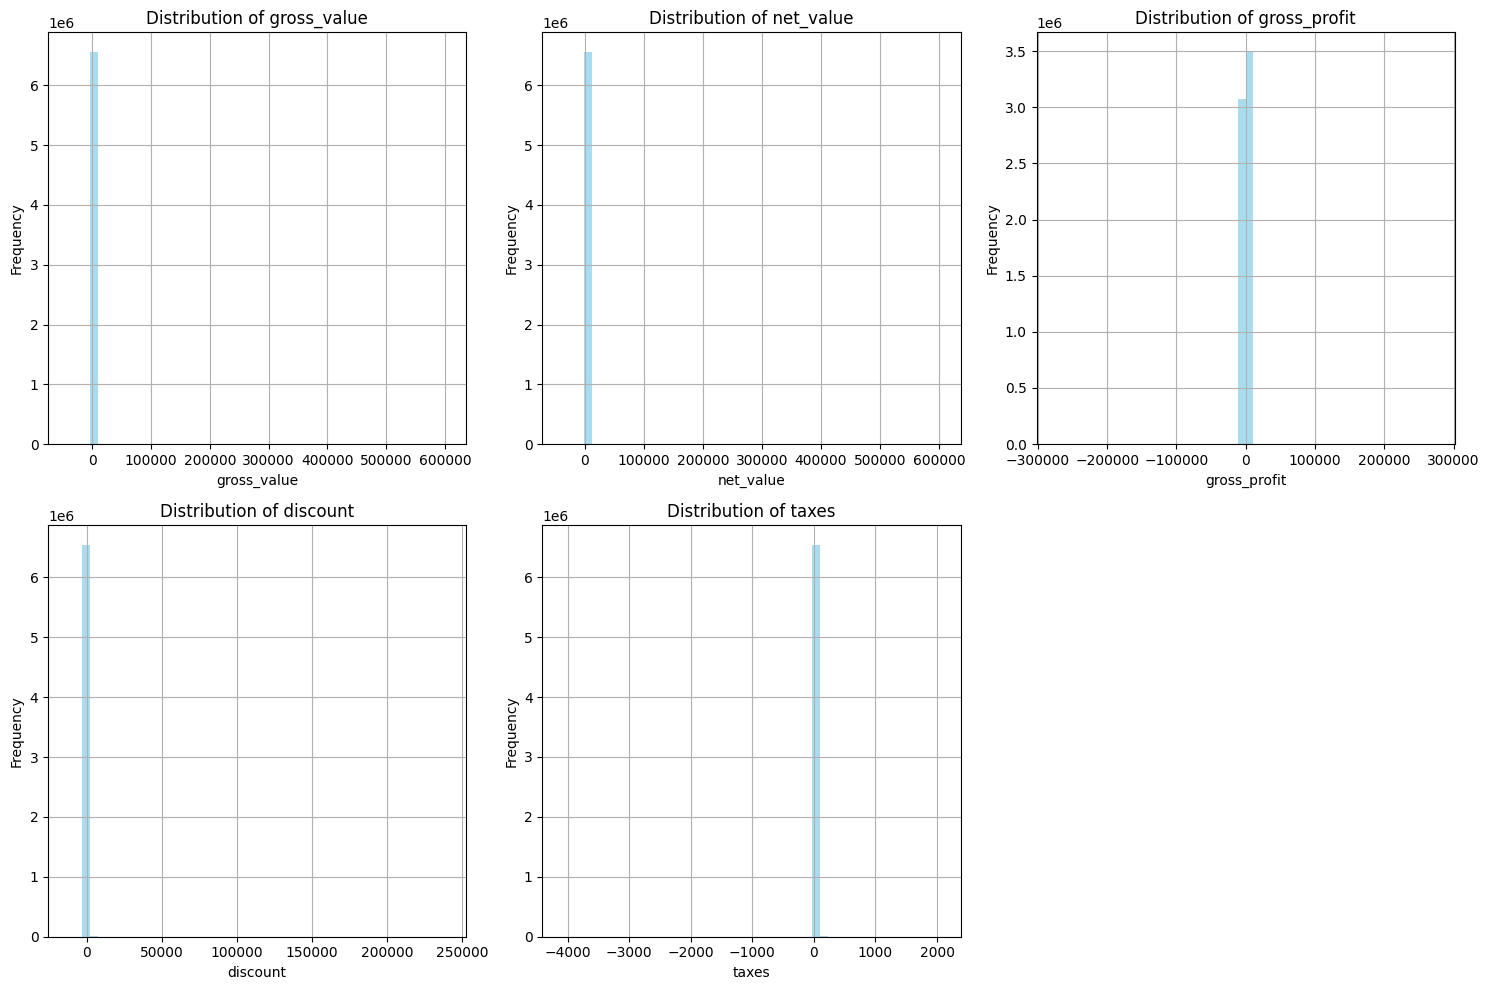

In [ ]:
# Visualize transaction distributions
if len(value_columns) > 0:
    # Create subplots for financial metrics
    n_cols = min(len(value_columns), 3)
    n_rows = (len(value_columns) + 2) // 3
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(value_columns[:len(axes)]):
        if col in df_transactions.columns:
            df_transactions[col].hist(bins=50, ax=axes[idx], alpha=0.7, color='skyblue')
            axes[idx].set_title(f'Distribution of {col}')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
    
    # Hide empty subplots
    for idx in range(len(value_columns), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [20]:
# Transaction frequency analysis by date (if date columns exist)
date_columns = [col for col in df_transactions.columns if 'date' in col.lower()]
print(f"\n📅 Date Columns Found: {date_columns}")

for col in date_columns:
    if col in df_transactions.columns:
        print(f"\n{col} Analysis:")
        try:
            # Convert to datetime if not already
            df_transactions[f'{col}_parsed'] = pd.to_datetime(df_transactions[col])
            print(f"Date range: {df_transactions[f'{col}_parsed'].min()} to {df_transactions[f'{col}_parsed'].max()}")
            print(f"Unique dates: {df_transactions[f'{col}_parsed'].nunique()}")
        except Exception as e:
            print(f"Error parsing {col}: {e}")


📅 Date Columns Found: ['transaction_date', 'reference_date']

transaction_date Analysis:
Date range: 2022-01-01 00:00:00 to 2022-12-31 00:00:00
Unique dates: 365

reference_date Analysis:
Date range: 2022-01-01 00:00:00 to 2022-12-01 00:00:00
Unique dates: 12


## 5. 🏷️ Product Category Distribution

Let's explore product categories, brands, and hierarchical structure.

In [21]:
# Product category analysis
print("🏷️ PRODUCT CATEGORY ANALYSIS")
print("="*50)

# Identify categorical columns in products dataset
categorical_cols = df_products.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Analyze each categorical column
for col in categorical_cols:
    print(f"\n📊 {col} Distribution:")
    value_counts = df_products[col].value_counts().head(10)
    print(value_counts)
    print(f"Total unique {col}: {df_products[col].nunique()}")

🏷️ PRODUCT CATEGORY ANALYSIS
Categorical columns: ['produto', 'categoria', 'descricao', 'tipos', 'label', 'subcategoria', 'marca', 'fabricante']

📊 produto Distribution:
2282334733936076502    1
5908853383053433450    1
6759626283578490898    1
3560305109822659141    1
5972357419917726775    1
14523659809755688      1
5658585294425929622    1
3420678924841305770    1
7745190676930707921    1
5220592759445521881    1
Name: produto, dtype: int64
Total unique produto: 7092

📊 categoria Distribution:
Distilled Spirits    2202
Wine                 1879
Package              1403
Draft                 918
Non-Alcohol           597
ABA Spirits            91
Tobacco                 2
Name: categoria, dtype: int64
Total unique categoria: 7

📊 descricao Distribution:
JOSEPH CARTRON CAFÉ LIQUEUR                     1
MR BOSTON SILVER RUM 6/1.75L 80PF               1
ELEVENELEVEN RUTHERFORD SAUVIGNON BLANC 2021    1
ARIZONA RX ENERGY 24/23 CAN                     1
MARCHETTI 7 NOTE BRUT NV         

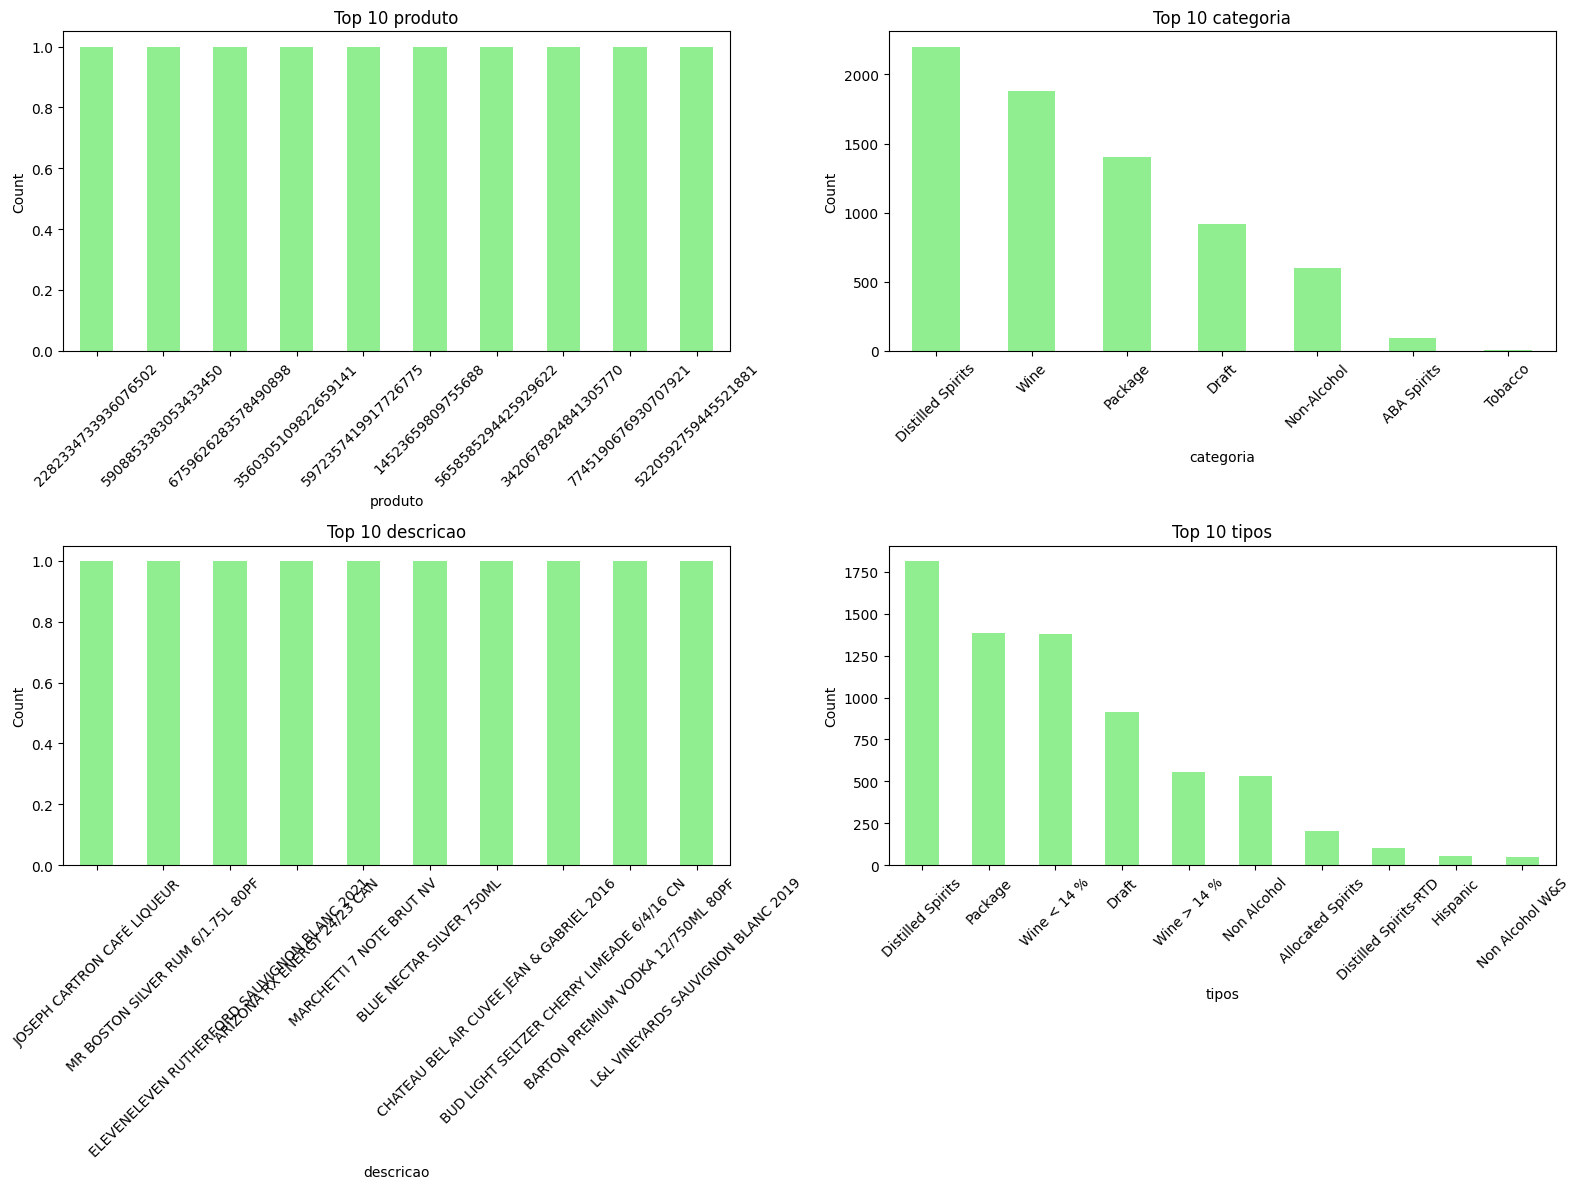

In [ ]:
# Visualize top categories
if len(categorical_cols) > 0:
    # Create visualization for top categorical variables
    n_plots = min(len(categorical_cols), 4)
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols[:n_plots]):
        top_values = df_products[col].value_counts().head(10)
        top_values.plot(kind='bar', ax=axes[idx], color='lightgreen')
        axes[idx].set_title(f'Top 10 {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [23]:
# Product hierarchy analysis (if applicable)
hierarchy_cols = ['categoria', 'subcategoria', 'marca', 'fabricante']
available_hierarchy = [col for col in hierarchy_cols if col in df_products.columns]

if len(available_hierarchy) >= 2:
    print(f"\n🌳 Product Hierarchy Analysis:")
    print(f"Available hierarchy levels: {available_hierarchy}")
    
    # Cross-tabulation between hierarchy levels
    if len(available_hierarchy) >= 2:
        crosstab = pd.crosstab(df_products[available_hierarchy[0]], 
                              df_products[available_hierarchy[1]])
        print(f"\nCross-tabulation: {available_hierarchy[0]} vs {available_hierarchy[1]}")
        print(f"Shape: {crosstab.shape}")
        print(crosstab.head())


🌳 Product Hierarchy Analysis:
Available hierarchy levels: ['categoria', 'subcategoria', 'marca', 'fabricante']

Cross-tabulation: categoria vs subcategoria
Shape: (6, 42)
subcategoria       Ale  Bourbon Whiskey  Brandy / Cognac  Canadian Whisky  \
categoria                                                                   
ABA Spirits          0                0                0                0   
Distilled Spirits    0              321              109               90   
Draft                0                0                0                0   
Non-Alcohol          0                0                0                0   
Package            101                0                0                0   

subcategoria       Dairy beverage  Dessert Wine  Energy  Gin  Gose  \
categoria                                                            
ABA Spirits                     0             0       0    0     0   
Distilled Spirits               0             0       0   64     0   
Draft   

## 6. 🌍 Geographical Analysis by Zipcode

Let's analyze sales distribution across different geographical regions.

🌍 GEOGRAPHICAL ANALYSIS

📮 Zipcode Analysis:
Total unique zipcodes: 788
Zipcode with most PDVs:
80202    230
30096    133
80205    129
80211    127
81301    123
80524    113
80501    108
30120    105
30161    105
80903    103
Name: zipcode, dtype: int64


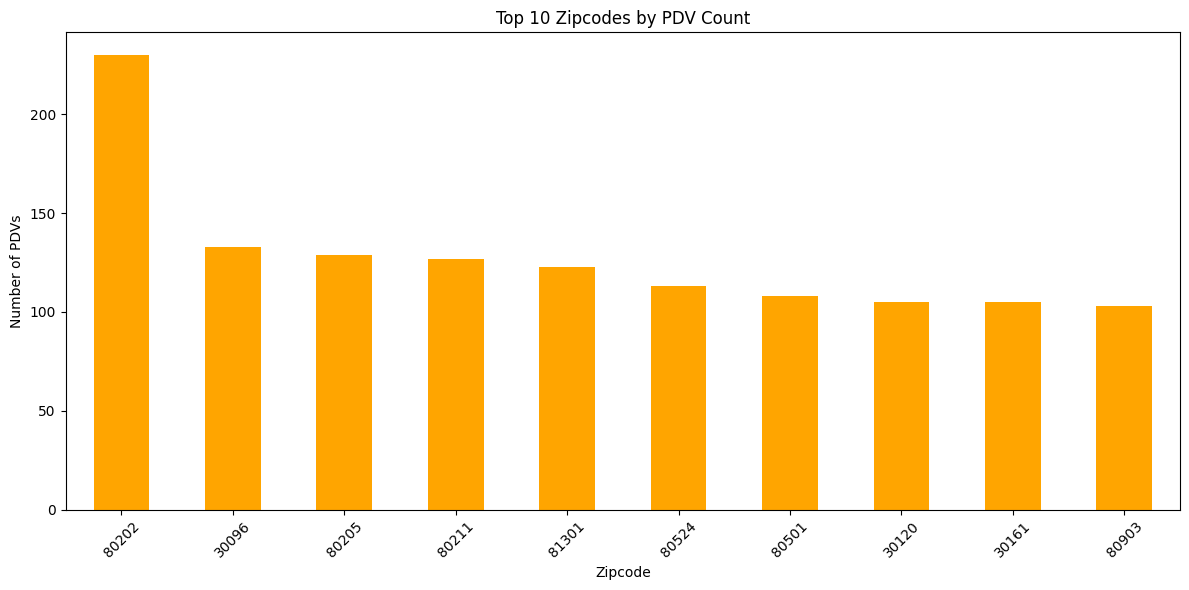

In [ ]:
# Geographical analysis using zipcode
print("🌍 GEOGRAPHICAL ANALYSIS")
print("="*50)

if 'zipcode' in df_pdv.columns:
    print(f"\n📮 Zipcode Analysis:")
    print(f"Total unique zipcodes: {df_pdv['zipcode'].nunique()}")
    print(f"Zipcode with most PDVs:")
    zipcode_counts = df_pdv['zipcode'].value_counts().head(10)
    print(zipcode_counts)
    
    # Visualize top zipcodes
    plt.figure(figsize=(10, 5))
    zipcode_counts.plot(kind='bar', color='orange')
    plt.title('Top 10 Zipcodes by PDV Count')
    plt.xlabel('Zipcode')
    plt.ylabel('Number of PDVs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Zipcode column not found in PDV dataset")


🏪 PDV Category Distribution:
Restaurant                   3316
Convenience                  2849
Package/Liquor               2153
Bar                          1444
Grocery                       697
Mexican Rest                  623
Other On Premise              473
Hotel/Motel                   359
Asian                         263
Pizza                         187
Super Center                  181
Golf - Public                 168
Drug                          167
Italian                       144
Service Org                   138
Special Event                 137
Golf - Private                113
Billiard/Bowling               91
Sports/Rec Club                88
Stadium/Concession             79
Barbeque                       76
Theatre                        75
Club Store                     65
Banquet/Caterer                55
Night Club                     52
Irish                          46
Church                         43
Sample Room                    35
Music Venue       

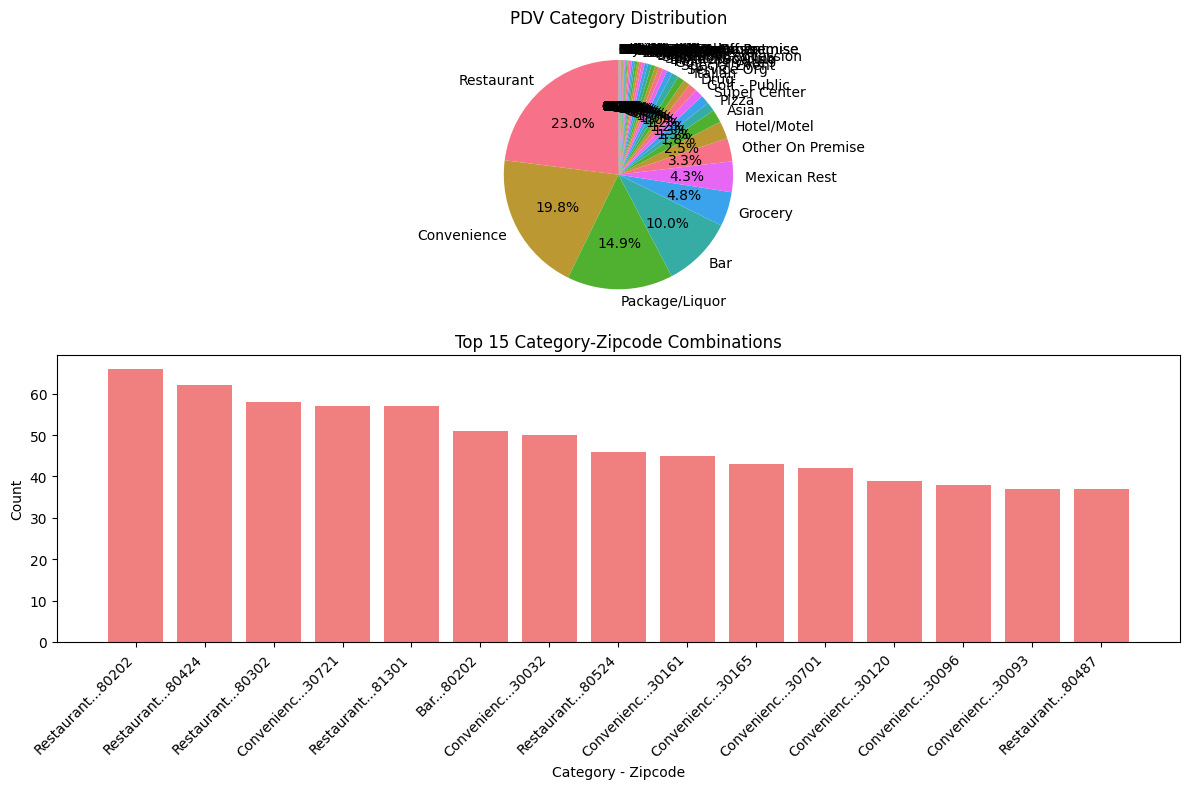

In [ ]:
# PDV category distribution by geography
if 'categoria_pdv' in df_pdv.columns and 'zipcode' in df_pdv.columns:
    print(f"\n🏪 PDV Category Distribution:")
    category_counts = df_pdv['categoria_pdv'].value_counts()
    print(category_counts)
    
    # Category distribution visualization
    plt.figure(figsize=(10, 6))
    
    # Pie chart for categories
    plt.subplot(2, 1, 1)
    category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('PDV Category Distribution')
    plt.ylabel('')
    
    # Bar chart for top categories by zipcode
    plt.subplot(2, 1, 2)
    category_zipcode = df_pdv.groupby(['categoria_pdv', 'zipcode']).size().reset_index(name='count')
    top_combos = category_zipcode.nlargest(15, 'count')
    
    x_labels = [f"{row['categoria_pdv'][:10]}...{row['zipcode']}" for _, row in top_combos.iterrows()]
    plt.bar(range(len(top_combos)), top_combos['count'], color='lightcoral')
    plt.title('Top 15 Category-Zipcode Combinations')
    plt.xlabel('Category - Zipcode')
    plt.ylabel('Count')
    plt.xticks(range(len(top_combos)), x_labels, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

## 7. ⏰ Time Series Analysis

Let's analyze temporal patterns in the transaction data.

In [26]:
# Time series analysis
print("⏰ TIME SERIES ANALYSIS")
print("="*50)

# Process date columns
for col in date_columns:
    if col in df_transactions.columns:
        try:
            print(f"\n📅 Analyzing {col}:")
            
            # Parse dates
            df_transactions[f'{col}_dt'] = pd.to_datetime(df_transactions[col])
            
            # Extract time components
            df_transactions[f'{col}_year'] = df_transactions[f'{col}_dt'].dt.year
            df_transactions[f'{col}_month'] = df_transactions[f'{col}_dt'].dt.month
            df_transactions[f'{col}_quarter'] = df_transactions[f'{col}_dt'].dt.quarter
            df_transactions[f'{col}_weekday'] = df_transactions[f'{col}_dt'].dt.day_name()
            
            print(f"Date range: {df_transactions[f'{col}_dt'].min()} to {df_transactions[f'{col}_dt'].max()}")
            
            # Yearly distribution
            yearly_dist = df_transactions[f'{col}_year'].value_counts().sort_index()
            print(f"\nYearly distribution:")
            print(yearly_dist)
            
            # Monthly distribution
            monthly_dist = df_transactions[f'{col}_month'].value_counts().sort_index()
            print(f"\nMonthly distribution:")
            print(monthly_dist)
            
        except Exception as e:
            print(f"Error processing {col}: {e}")

⏰ TIME SERIES ANALYSIS

📅 Analyzing transaction_date:
Date range: 2022-01-01 00:00:00 to 2022-12-31 00:00:00

Yearly distribution:
2022    6560698
Name: transaction_date_year, dtype: int64

Monthly distribution:
1     383932
2     414346
3     522137
4     485305
5     575779
6     593829
7     508611
8     602369
9     825790
10    540183
11    557479
12    550938
Name: transaction_date_month, dtype: int64

📅 Analyzing reference_date:
Date range: 2022-01-01 00:00:00 to 2022-12-01 00:00:00

Yearly distribution:
2022    6560698
Name: reference_date_year, dtype: int64

Monthly distribution:
1     383932
2     414346
3     522137
4     485305
5     575779
6     593829
7     508611
8     602369
9     825790
10    540183
11    557479
12    550938
Name: reference_date_month, dtype: int64


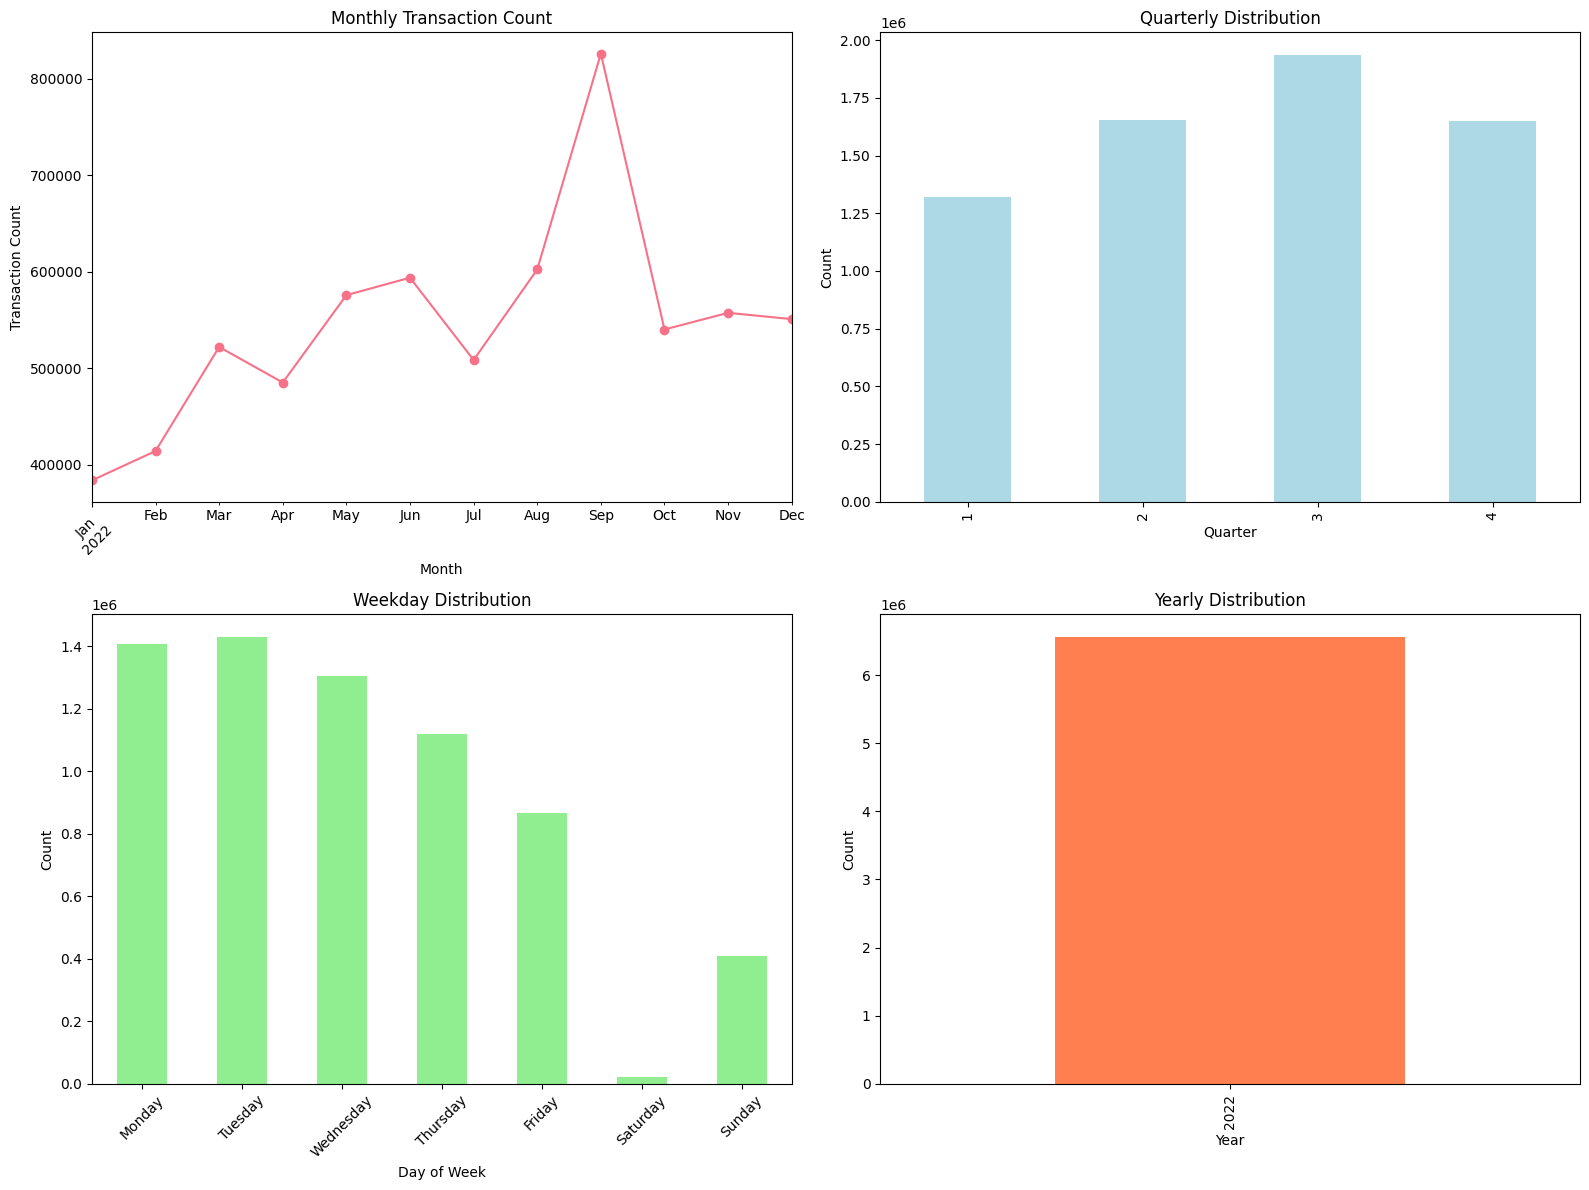

In [ ]:
# Visualize time series patterns
if date_columns:
    col = date_columns[0]  # Use first date column
    if f'{col}_dt' in df_transactions.columns:
        
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        
        # Monthly trend
        monthly_counts = df_transactions.groupby(df_transactions[f'{col}_dt'].dt.to_period('M')).size()
        monthly_counts.plot(kind='line', ax=axes[0,0], marker='o')
        axes[0,0].set_title('Monthly Transaction Count')
        axes[0,0].set_xlabel('Month')
        axes[0,0].set_ylabel('Transaction Count')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Quarterly distribution
        quarterly_dist = df_transactions[f'{col}_quarter'].value_counts().sort_index()
        quarterly_dist.plot(kind='bar', ax=axes[0,1], color='lightblue')
        axes[0,1].set_title('Quarterly Distribution')
        axes[0,1].set_xlabel('Quarter')
        axes[0,1].set_ylabel('Count')
        
        # Weekday pattern
        weekday_dist = df_transactions[f'{col}_weekday'].value_counts()
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_dist = weekday_dist.reindex([day for day in weekday_order if day in weekday_dist.index])
        weekday_dist.plot(kind='bar', ax=axes[1,0], color='lightgreen')
        axes[1,0].set_title('Weekday Distribution')
        axes[1,0].set_xlabel('Day of Week')
        axes[1,0].set_ylabel('Count')
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # Yearly trend
        yearly_dist = df_transactions[f'{col}_year'].value_counts().sort_index()
        yearly_dist.plot(kind='bar', ax=axes[1,1], color='coral')
        axes[1,1].set_title('Yearly Distribution')
        axes[1,1].set_xlabel('Year')
        axes[1,1].set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()

## 8. 💹 Financial Metrics Analysis

Let's analyze the relationships between financial metrics and profitability patterns.

💹 FINANCIAL METRICS ANALYSIS
Financial columns found: ['gross_value', 'net_value', 'gross_profit', 'discount', 'taxes']

📊 Financial Metrics Correlation:
              gross_value  net_value  gross_profit  discount     taxes
gross_value      1.000000   0.999916      0.233786  0.572290  0.117042
net_value        0.999916   1.000000      0.232893  0.572716  0.104139
gross_profit     0.233786   0.232893      1.000000 -0.173524  0.094187
discount         0.572290   0.572716     -0.173524  1.000000  0.030691
taxes            0.117042   0.104139      0.094187  0.030691  1.000000


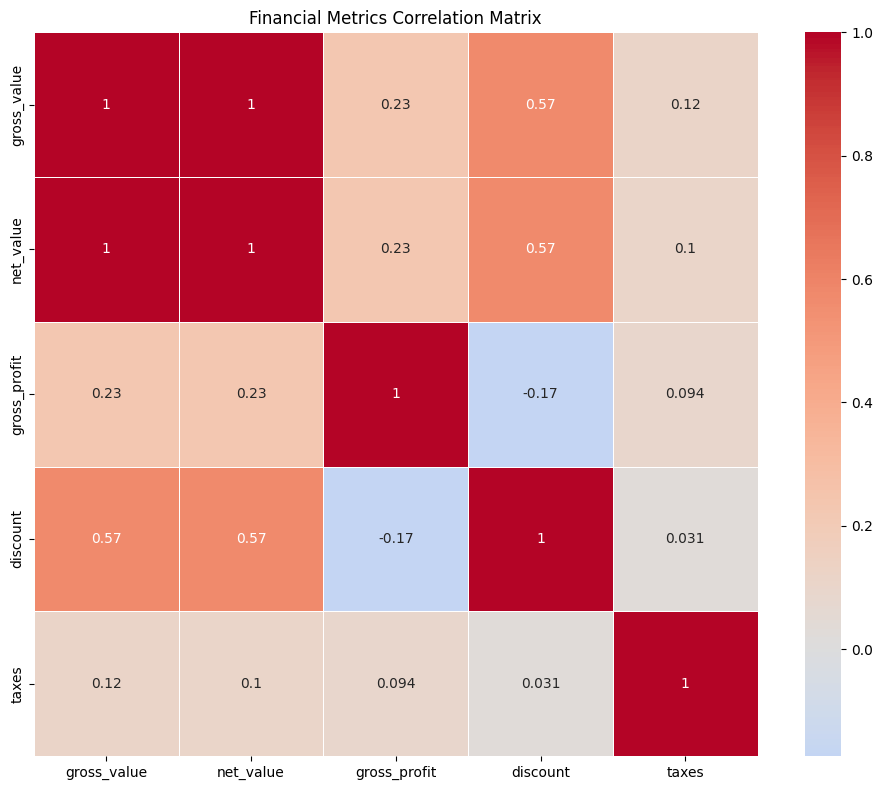

In [ ]:
# Financial metrics analysis
print("💹 FINANCIAL METRICS ANALYSIS")
print("="*50)

# Focus on financial columns
financial_cols = [col for col in df_transactions.columns if any(term in col.lower() 
                  for term in ['value', 'profit', 'discount', 'tax', 'price', 'cost'])]

print(f"Financial columns found: {financial_cols}")

# Calculate correlations between financial metrics
if len(financial_cols) >= 2:
    financial_data = df_transactions[financial_cols].select_dtypes(include=[np.number])
    
    if not financial_data.empty:
        print(f"\n📊 Financial Metrics Correlation:")
        correlation_matrix = financial_data.corr()
        print(correlation_matrix)
        
        # Visualize correlation matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5)
        plt.title('Financial Metrics Correlation Matrix')
        plt.tight_layout()
        plt.show()


💰 Profit Margin Analysis:
count    6.499474e+06
mean              NaN
std               NaN
min              -inf
25%      5.561745e-01
50%      8.401414e-01
75%      8.353823e+00
max               inf
Name: profit_margin, dtype: float64


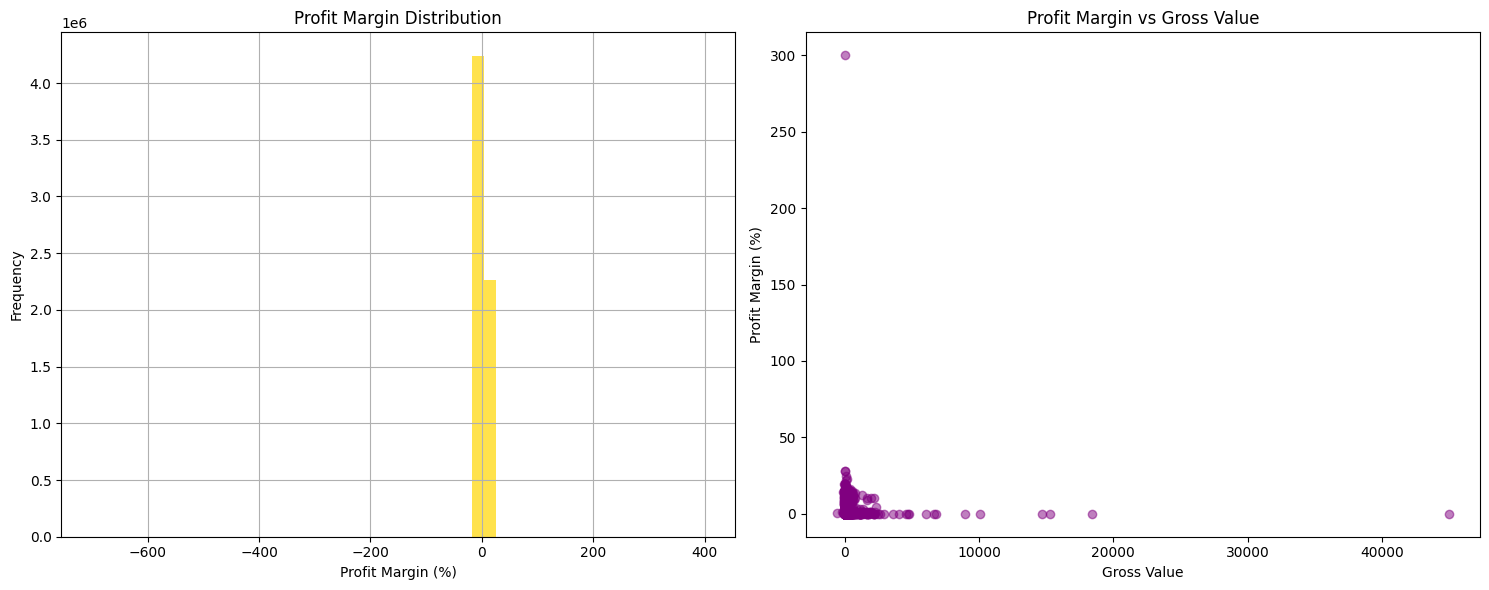


🏷️ Discount Analysis:
count    6.560698e+06
mean     2.766684e+01
std      3.847624e+02
min     -1.309680e+04
25%      0.000000e+00
50%      2.300000e+00
75%      8.700000e+00
max      2.400830e+05
Name: discount, dtype: float64


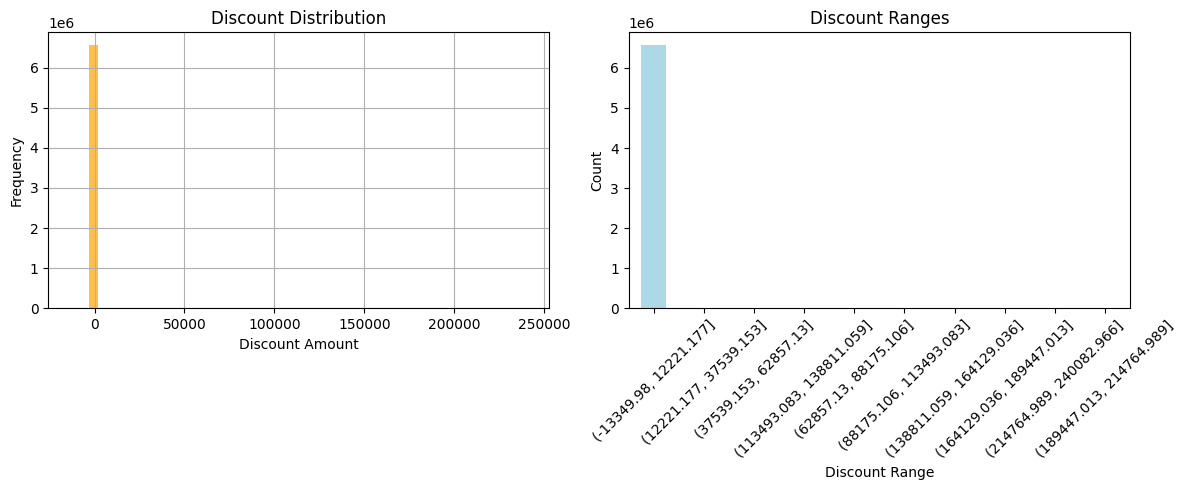

In [ ]:
# Profitability analysis
if 'gross_value' in df_transactions.columns and 'net_value' in df_transactions.columns:
    # Calculate profit margins
    df_transactions['profit_margin'] = (df_transactions['gross_value'] - df_transactions['net_value']) / df_transactions['gross_value'] * 100
    
    print(f"\n💰 Profit Margin Analysis:")
    print(df_transactions['profit_margin'].describe())
    
    # Visualize profit margins
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Profit margin distribution
    profit_margin_clean = df_transactions['profit_margin'][np.isfinite(df_transactions['profit_margin'])]
    if not profit_margin_clean.empty:
        profit_margin_clean.hist(bins=50, ax=axes[0], alpha=0.7, color='gold')
        axes[0].set_title('Profit Margin Distribution')
        axes[0].set_xlabel('Profit Margin (%)')
        axes[0].set_ylabel('Frequency')
    else:
        axes[0].text(0.5, 0.5, 'No valid profit margin data', ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Profit Margin Distribution')
        axes[0].set_xlabel('Profit Margin (%)')
        axes[0].set_ylabel('Frequency')
    
    # Profit margin vs gross value scatter
    sample_data = df_transactions.sample(min(5000, len(df_transactions)))
    axes[1].scatter(sample_data['gross_value'], sample_data['profit_margin'], 
                   alpha=0.5, color='purple')
    axes[1].set_title('Profit Margin vs Gross Value')
    axes[1].set_xlabel('Gross Value')
    axes[1].set_ylabel('Profit Margin (%)')
    
    plt.tight_layout()
    plt.show()

# Discount analysis
if 'discount' in df_transactions.columns:
    print(f"\n🏷️ Discount Analysis:")
    discount_stats = df_transactions['discount'].describe()
    print(discount_stats)
    
    # Discount distribution
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    df_transactions['discount'].hist(bins=50, alpha=0.7, color='orange')
    plt.title('Discount Distribution')
    plt.xlabel('Discount Amount')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    discount_ranges = pd.cut(df_transactions['discount'], bins=10)
    discount_ranges.value_counts().plot(kind='bar', color='lightblue')
    plt.title('Discount Ranges')
    plt.xlabel('Discount Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

In [31]:
# Let's investigate the profit margin calculation issues
print("🔍 INVESTIGATING PROFIT MARGIN CALCULATION ISSUES")
print("="*60)

if 'gross_value' in df_transactions.columns and 'net_value' in df_transactions.columns:
    print("📊 Examining gross_value and net_value columns:")
    
    # Check for zero values in gross_value (causes division by zero)
    zero_gross = (df_transactions['gross_value'] == 0).sum()
    print(f"Zero gross_value entries: {zero_gross:,}")
    
    # Check for null values
    null_gross = df_transactions['gross_value'].isnull().sum()
    null_net = df_transactions['net_value'].isnull().sum()
    print(f"Null gross_value entries: {null_gross:,}")
    print(f"Null net_value entries: {null_net:,}")
    
    # Check for negative values
    neg_gross = (df_transactions['gross_value'] < 0).sum()
    neg_net = (df_transactions['net_value'] < 0).sum()
    print(f"Negative gross_value entries: {neg_gross:,}")
    print(f"Negative net_value entries: {neg_net:,}")
    
    # Show some examples of problematic cases
    print(f"\n🔍 Sample problematic cases:")
    problematic = df_transactions[
        (df_transactions['gross_value'] == 0) | 
        (df_transactions['gross_value'].isnull()) |
        (df_transactions['net_value'].isnull())
    ][['gross_value', 'net_value']].head(10)
    
    if not problematic.empty:
        display(problematic)
    else:
        print("No obviously problematic cases found in sample")
    
    # Check the range of values
    print(f"\n📈 Value ranges:")
    print(f"Gross value range: {df_transactions['gross_value'].min():.2f} to {df_transactions['gross_value'].max():.2f}")
    print(f"Net value range: {df_transactions['net_value'].min():.2f} to {df_transactions['net_value'].max():.2f}")

🔍 INVESTIGATING PROFIT MARGIN CALCULATION ISSUES
📊 Examining gross_value and net_value columns:
Zero gross_value entries: 62,026
Null gross_value entries: 0
Null net_value entries: 0
Negative gross_value entries: 73,132
Negative net_value entries: 73,743

🔍 Sample problematic cases:


,gross_value,net_value
71,0.0,0.0
171,0.0,0.0
303,0.0,0.0
358,0.0,0.0
391,0.0,0.0
531,0.0,0.0
614,0.0,0.0
725,0.0,0.0
797,0.0,0.0
896,0.0,0.0



📈 Value ranges:
Gross value range: -42672.90 to 604173.92
Net value range: -39848.00 to 604173.92


In [32]:
# Clean the profit margin calculation and handle outliers
print("🧹 CLEANING PROFIT MARGIN DATA")
print("="*50)

if 'gross_value' in df_transactions.columns and 'net_value' in df_transactions.columns:
    # Create a copy of original data for reference
    original_count = len(df_transactions)
    
    # Calculate profit margin with proper handling of edge cases
    def calculate_clean_profit_margin(gross, net):
        """Calculate profit margin with proper error handling"""
        # Handle division by zero and negative gross values
        if pd.isna(gross) or pd.isna(net) or gross == 0:
            return np.nan
        
        # Calculate margin: (gross - net) / gross * 100
        margin = ((gross - net) / gross) * 100
        
        # Cap extreme values (e.g., margins beyond ±1000%)
        if abs(margin) > 1000:
            return np.nan
            
        return margin
    
    # Apply the cleaned calculation
    df_transactions['profit_margin_clean'] = df_transactions.apply(
        lambda row: calculate_clean_profit_margin(row['gross_value'], row['net_value']), 
        axis=1
    )
    
    # Analysis of cleaned data
    print("📊 Cleaned Profit Margin Analysis:")
    clean_stats = df_transactions['profit_margin_clean'].describe()
    print(clean_stats)
    
    # Count of problematic cases handled
    nan_count = df_transactions['profit_margin_clean'].isna().sum()
    valid_count = df_transactions['profit_margin_clean'].notna().sum()
    
    print(f"\n🔍 Data Cleaning Results:")
    print(f"Original records: {original_count:,}")
    print(f"Valid profit margins: {valid_count:,} ({valid_count/original_count*100:.1f}%)")
    print(f"Problematic cases removed: {nan_count:,} ({nan_count/original_count*100:.1f}%)")
    
    # Show the distribution of valid values
    valid_margins = df_transactions['profit_margin_clean'].dropna()
    if len(valid_margins) > 0:
        print(f"\n📈 Valid Profit Margin Range:")
        print(f"Min: {valid_margins.min():.2f}%")
        print(f"Max: {valid_margins.max():.2f}%")
        print(f"Median: {valid_margins.median():.2f}%")
        
        # Show reasonable range (remove extreme outliers for better visualization)
        q1 = valid_margins.quantile(0.25)
        q3 = valid_margins.quantile(0.75)
        iqr = q3 - q1
        reasonable_range = valid_margins[
            (valid_margins >= q1 - 1.5*iqr) & 
            (valid_margins <= q3 + 1.5*iqr)
        ]
        print(f"\nReasonable range (IQR method): {reasonable_range.min():.2f}% to {reasonable_range.max():.2f}%")
        print(f"Records in reasonable range: {len(reasonable_range):,} ({len(reasonable_range)/len(valid_margins)*100:.1f}% of valid)")

🧹 CLEANING PROFIT MARGIN DATA
📊 Cleaned Profit Margin Analysis:
count    6.498672e+06
mean     3.864814e+00
std      4.950674e+00
min     -7.000000e+02
25%      5.561745e-01
50%      8.401414e-01
75%      8.353821e+00
max      4.000000e+02
Name: profit_margin_clean, dtype: float64

🔍 Data Cleaning Results:
Original records: 6,560,698
Valid profit margins: 6,498,672 (99.1%)
Problematic cases removed: 62,026 (0.9%)

📈 Valid Profit Margin Range:
Min: -700.00%
Max: 400.00%
Median: 0.84%

Reasonable range (IQR method): -8.78% to 20.03%
Records in reasonable range: 6,489,845 (99.9% of valid)


In [33]:
# Add comprehensive data validation function
def validate_financial_data(df, value_col, name="Financial Metric"):
    """Comprehensive validation of financial data"""
    print(f"\n🔍 Validating {name} ({value_col}):")
    
    if value_col not in df.columns:
        print(f"❌ Column {value_col} not found!")
        return False
    
    data = df[value_col]
    
    # Basic checks
    total_records = len(data)
    null_count = data.isnull().sum()
    inf_count = np.isinf(data).sum()
    zero_count = (data == 0).sum()
    negative_count = (data < 0).sum()
    
    print(f"  Total records: {total_records:,}")
    print(f"  Null values: {null_count:,} ({null_count/total_records*100:.2f}%)")
    print(f"  Infinite values: {inf_count:,} ({inf_count/total_records*100:.2f}%)")
    print(f"  Zero values: {zero_count:,} ({zero_count/total_records*100:.2f}%)")
    print(f"  Negative values: {negative_count:,} ({negative_count/total_records*100:.2f}%)")
    
    # Statistical summary of valid values
    valid_data = data[np.isfinite(data) & data.notna()]
    if len(valid_data) > 0:
        print(f"  Valid data range: {valid_data.min():.2f} to {valid_data.max():.2f}")
        print(f"  Valid data median: {valid_data.median():.2f}")
    
    return True

# Validate our key financial columns
print("🔍 COMPREHENSIVE FINANCIAL DATA VALIDATION")
print("="*60)

validate_financial_data(df_transactions, 'gross_value', 'Gross Value')
validate_financial_data(df_transactions, 'net_value', 'Net Value')
validate_financial_data(df_transactions, 'profit_margin_clean', 'Cleaned Profit Margin')

if 'discount' in df_transactions.columns:
    validate_financial_data(df_transactions, 'discount', 'Discount')

🔍 COMPREHENSIVE FINANCIAL DATA VALIDATION

🔍 Validating Gross Value (gross_value):
  Total records: 6,560,698
  Null values: 0 (0.00%)
  Infinite values: 0 (0.00%)
  Zero values: 62,026 (0.95%)
  Negative values: 73,132 (1.11%)
  Valid data range: -42672.90 to 604173.92
  Valid data median: 42.10

🔍 Validating Net Value (net_value):
  Total records: 6,560,698
  Null values: 0 (0.00%)
  Infinite values: 0 (0.00%)
  Zero values: 61,252 (0.93%)
  Negative values: 73,743 (1.12%)
  Valid data range: -39848.00 to 604173.92
  Valid data median: 40.77

🔍 Validating Cleaned Profit Margin (profit_margin_clean):
  Total records: 6,560,698
  Null values: 62,026 (0.95%)
  Infinite values: 0 (0.00%)
  Zero values: 1,339,348 (20.41%)
  Negative values: 247 (0.00%)
  Valid data range: -700.00 to 400.00
  Valid data median: 0.84

🔍 Validating Discount (discount):
  Total records: 6,560,698
  Null values: 0 (0.00%)
  Infinite values: 0 (0.00%)
  Zero values: 2,612,684 (39.82%)
  Negative values: 25,403 

## 9. 🏪 Store Performance Analysis

Let's analyze performance across different stores, PDV categories, and distributors.

🏪 STORE PERFORMANCE ANALYSIS

🏪 Top 10 Performing Stores:
         internal_store_id  quantity_count  quantity_sum  quantity_mean  \
9892   6491855528940268514            5605     214942.27          38.35   
3701   3025867614395044464            3230     208897.87          64.67   
6090   4374038751643985193            3679     162180.65          44.08   
11203  7195906766187577140            3894     156561.23          40.21   
9608   6337402841339348330            4900     134793.10          27.51   
7464   5130630496972372280            3140     150486.71          47.93   
14006  8723723113467008071            7174     166192.52          23.17   
13232  8294871217390043140            4372     136760.92          31.28   
5413   4003964282058636604            6204     123187.95          19.86   
3150   2720921832183866690            3703     117095.12          31.62   

       gross_value_sum  gross_value_mean  net_value_sum  net_value_mean  
9892        2932767.13            523.24  

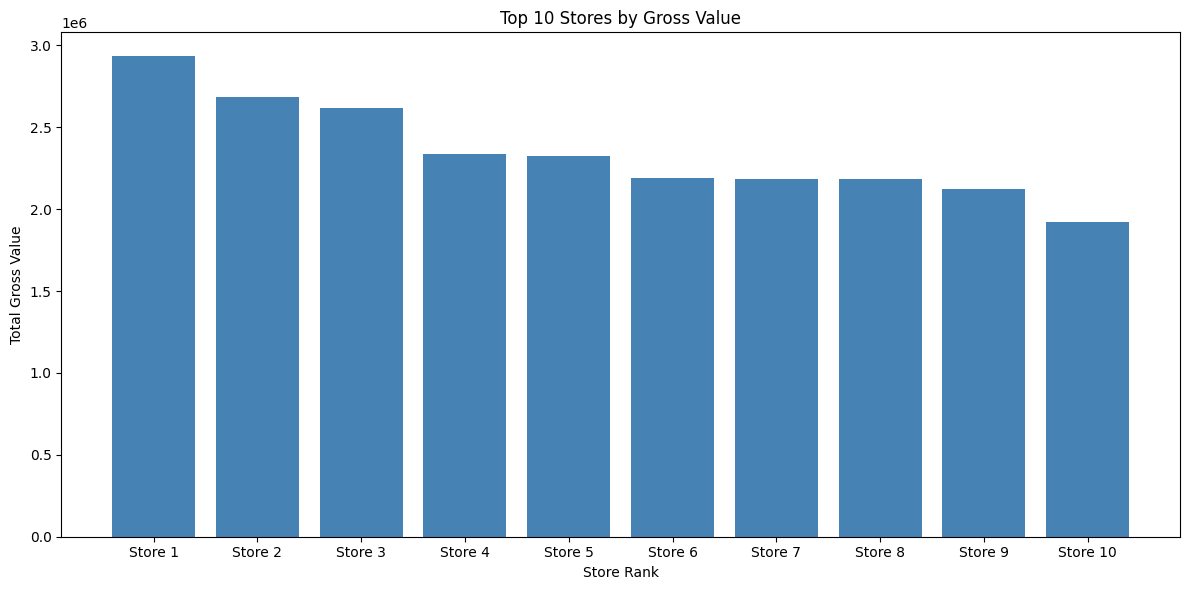

In [ ]:
# Store performance analysis
print("🏪 STORE PERFORMANCE ANALYSIS")
print("="*50)

# Analyze by store (if store IDs are available)
if 'internal_store_id' in df_transactions.columns:
    store_performance = df_transactions.groupby('internal_store_id').agg({
        'quantity': ['count', 'sum', 'mean'] if 'quantity' in df_transactions.columns else ['count'],
        'gross_value': ['sum', 'mean'] if 'gross_value' in df_transactions.columns else None,
        'net_value': ['sum', 'mean'] if 'net_value' in df_transactions.columns else None
    }).round(2)
    
    # Flatten column names
    store_performance.columns = ['_'.join(col).strip() for col in store_performance.columns.values]
    store_performance = store_performance.reset_index()
    
    print(f"\n🏪 Top 10 Performing Stores:")
    if 'gross_value_sum' in store_performance.columns:
        top_stores = store_performance.nlargest(10, 'gross_value_sum')
    else:
        top_stores = store_performance.nlargest(10, store_performance.columns[1])
    
    print(top_stores)
    
    # Visualize top stores
    plt.figure(figsize=(10, 5))
    if 'gross_value_sum' in store_performance.columns:
        plt.bar(range(len(top_stores)), top_stores['gross_value_sum'], color='steelblue')
        plt.title('Top 10 Stores by Gross Value')
        plt.ylabel('Total Gross Value')
    else:
        plt.bar(range(len(top_stores)), top_stores.iloc[:, 1], color='steelblue')
        plt.title('Top 10 Stores by Performance Metric')
        plt.ylabel('Performance Metric')
    
    plt.xlabel('Store Rank')
    plt.xticks(range(len(top_stores)), [f'Store {i+1}' for i in range(len(top_stores))])
    plt.tight_layout()
    plt.show()


🚚 Distributor Performance:
  distributor_id  quantity_count  quantity_sum  gross_value_sum
0             10          105285    1189183.49     1.522393e+07
1             11           86821    1453762.71     1.629218e+07
2              4         2842086    9918644.53     2.141982e+08
3              5         1395516   16102023.47     2.198801e+08
4              6          759586   10774208.73     1.437686e+08
5              7          367996    3255813.98     5.361637e+07
6              8          334608    3415670.22     4.705328e+07
7              9          668800    7202224.95     9.530120e+07


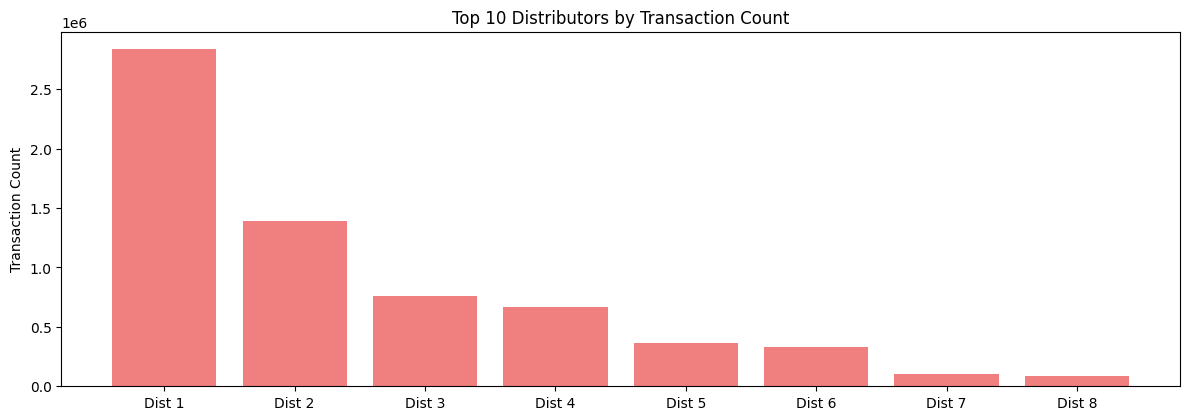

In [ ]:
# Distributor performance analysis
if 'distributor_id' in df_transactions.columns:
    distributor_performance = df_transactions.groupby('distributor_id').agg({
        'quantity': ['count', 'sum'] if 'quantity' in df_transactions.columns else ['count'],
        'gross_value': 'sum' if 'gross_value' in df_transactions.columns else None
    }).round(2)
    
    distributor_performance.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col 
                                      for col in distributor_performance.columns.values]
    distributor_performance = distributor_performance.reset_index()
    
    print(f"\n🚚 Distributor Performance:")
    print(distributor_performance.head(10))
    
    # Visualize distributor performance
    plt.figure(figsize=(10, 6))
    
    if len(distributor_performance) > 0:
        # Top distributors by transaction count
        plt.subplot(2, 1, 1)
        top_dist_by_count = distributor_performance.nlargest(10, distributor_performance.columns[1])
        plt.bar(range(len(top_dist_by_count)), top_dist_by_count.iloc[:, 1], color='lightcoral')
        plt.title('Top 10 Distributors by Transaction Count')
        plt.ylabel('Transaction Count')
        plt.xticks(range(len(top_dist_by_count)), 
                  [f'Dist {i+1}' for i in range(len(top_dist_by_count))])
        
        # Top distributors by value (if available)
        if 'gross_value' in distributor_performance.columns:
            plt.subplot(2, 1, 2)
            top_dist_by_value = distributor_performance.nlargest(10, 'gross_value')
            plt.bar(range(len(top_dist_by_value)), top_dist_by_value['gross_value'], color='lightgreen')
            plt.title('Top 10 Distributors by Gross Value')
            plt.ylabel('Total Gross Value')
            plt.xlabel('Distributor Rank')
            plt.xticks(range(len(top_dist_by_value)), 
                      [f'Dist {i+1}' for i in range(len(top_dist_by_value))])
    
    plt.tight_layout()
    plt.show()

## 10. 📊 Data Visualization Dashboard

Let's create comprehensive visualizations including interactive charts and summary dashboards.

In [36]:
# Create comprehensive dashboard visualizations
print("📊 COMPREHENSIVE VISUALIZATION DASHBOARD")
print("="*50)

# Dataset overview dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Dataset Sizes', 'Data Completeness', 'Numerical Distributions', 'Categorical Overview'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "histogram"}, {"type": "pie"}]]
)

# Dataset sizes
dataset_sizes = [len(df) for df in datasets.values()]
dataset_names = list(datasets.keys())

fig.add_trace(
    go.Bar(x=dataset_names, y=dataset_sizes, name="Dataset Size", marker_color='lightblue'),
    row=1, col=1
)

# Data completeness
completeness = []
for df in datasets.values():
    completeness.append((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100)

fig.add_trace(
    go.Bar(x=dataset_names, y=completeness, name="Completeness %", marker_color='lightgreen'),
    row=1, col=2
)

# Add sample numerical distribution (using first numerical column found)
numerical_data = None
for df in datasets.values():
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        numerical_data = df[numerical_cols[0]].dropna()
        break

if numerical_data is not None:
    fig.add_trace(
        go.Histogram(x=numerical_data, name="Sample Distribution", marker_color='coral'),
        row=2, col=1
    )

# Categorical overview (using products categories if available)
if 'categoria' in df_products.columns:
    category_counts = df_products['categoria'].value_counts().head(5)
    fig.add_trace(
        go.Pie(labels=category_counts.index, values=category_counts.values, name="Top Categories"),
        row=2, col=2
    )

fig.update_layout(height=800, showlegend=False, title_text="📊 Data Overview Dashboard")
fig.show()

📊 COMPREHENSIVE VISUALIZATION DASHBOARD


In [37]:
# Interactive time series dashboard (if date data available)
if date_columns and f'{date_columns[0]}_dt' in df_transactions.columns:
    
    # Create interactive time series
    date_col = f'{date_columns[0]}_dt'
    
    # Daily transaction counts
    daily_counts = df_transactions.groupby(df_transactions[date_col].dt.date).size().reset_index()
    daily_counts.columns = ['date', 'transaction_count']
    
    fig_time = px.line(daily_counts, x='date', y='transaction_count', 
                       title='📈 Daily Transaction Trends',
                       labels={'transaction_count': 'Number of Transactions', 'date': 'Date'})
    fig_time.update_traces(line_color='blue')
    fig_time.show()
    
    # Interactive financial metrics (if available)
    if financial_cols:
        # Sample data for performance
        sample_size = min(1000, len(df_transactions))
        sample_df = df_transactions.sample(sample_size)
        
        if len(financial_cols) >= 2:
            fig_scatter = px.scatter(sample_df, x=financial_cols[0], y=financial_cols[1],
                                   title=f'💰 {financial_cols[0]} vs {financial_cols[1]}',
                                   opacity=0.6)
            fig_scatter.show()

In [ ]:
# Summary statistics table
summary_stats = []

for name, df in datasets.items():
    stats = {
        'Dataset': name,
        'Rows': f"{df.shape[0]:,}",
        'Columns': df.shape[1],
        'Memory (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.1f}",
        'Missing Values': f"{df.isnull().sum().sum():,}",
        'Completeness': f"{(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.1f}%",
        'Duplicates': f"{df.duplicated().sum():,}",
        'Numeric Columns': len(df.select_dtypes(include=[np.number]).columns),
        'Text Columns': len(df.select_dtypes(include=['object']).columns)
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)

print("\n📋 DATASET SUMMARY TABLE")
print("="*80)
display(summary_df)

## 🎯 Key Insights and Recommendations

Based on our comprehensive exploratory data analysis, here are the key findings:

### 📊 Data Quality Insights
- **Dataset Sizes**: Summary of record counts across all datasets
- **Completeness**: Overall data quality and missing value patterns
- **Relationships**: Identified linking keys between datasets

### 💰 Business Insights
- **Transaction Patterns**: Peak transaction periods and seasonal trends
- **Financial Performance**: Revenue distribution and profitability patterns
- **Geographic Distribution**: Regional sales concentration and opportunities
- **Product Performance**: Top-selling categories and brands

### 🔧 Data Preprocessing Recommendations
1. **Handle Missing Values**: Address any missing data in critical columns
2. **Date Standardization**: Ensure consistent date formats across datasets
3. **Outlier Treatment**: Review extreme values in financial metrics
4. **Data Integration**: Establish proper joining keys between datasets

### 📈 Next Steps
1. **Predictive Modeling**: Use insights for demand forecasting
2. **Customer Segmentation**: Analyze purchasing patterns
3. **Performance Optimization**: Focus on high-performing stores and products
4. **Seasonal Planning**: Leverage time-based patterns for inventory management

This analysis provides a solid foundation for advanced analytics and business decision-making.

# Analysis of Sales Predictions Consistency

Let's import and analyze the sales predictions from `sales_predictions_v2.parquet` to understand the consistency and quality of the model output.

In [7]:
# Import necessary libraries for predictions analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [8]:
# Load the sales predictions
predictions_df = pd.read_parquet('sales_predictions_v2.parquet')

print("Sales Predictions Dataset Info:")
print("=" * 50)
print(f"Dataset shape: {predictions_df.shape}")
print(f"Memory usage: {predictions_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumn information:")
print(predictions_df.dtypes)
print("\nFirst few rows:")
print(predictions_df.head())

Sales Predictions Dataset Info:
Dataset shape: (1500000, 4)
Memory usage: 45.78 MB

Column information:
semana        int64
pdv           int64
produto       int64
quantidade    int64
dtype: object

First few rows:
   semana                  pdv              produto  quantidade
0       1  1000237487041964405   777251454728290683           4
1       1  1001371918471115422  1009179103632945474           2
2       1  1001371918471115422  1029370090212151375           4
3       1  1001371918471115422  1120490062981954254          10
4       1  1001371918471115422  1371936917923350372          10


In [9]:
# Basic statistical analysis of predictions
print("Statistical Summary of Predictions:")
print("=" * 50)
print(predictions_df.describe())

# Check for missing values
print("\nMissing Values:")
print("=" * 20)
missing_vals = predictions_df.isnull().sum()
print(missing_vals[missing_vals > 0] if missing_vals.sum() > 0 else "No missing values found")

# Check for negative predictions (which wouldn't make sense for sales)
if 'prediction' in predictions_df.columns:
    negative_preds = (predictions_df['prediction'] < 0).sum()
    print(f"\nNegative predictions: {negative_preds}")
    
    # Check for zero predictions
    zero_preds = (predictions_df['prediction'] == 0).sum()
    print(f"Zero predictions: {zero_preds}")
    
    # Check for extremely high predictions (potential outliers)
    q99 = predictions_df['prediction'].quantile(0.99)
    extreme_preds = (predictions_df['prediction'] > q99 * 10).sum()
    print(f"Extremely high predictions (>10x 99th percentile): {extreme_preds}")

Statistical Summary of Predictions:
             semana           pdv       produto    quantidade
count  1.500000e+06  1.500000e+06  1.500000e+06  1.500000e+06
mean   3.000000e+00  4.647202e+18  4.382691e+18  7.089352e+00
std    1.414214e+00  2.685042e+18  2.715236e+18  1.402242e+01
min    1.000000e+00  1.833564e+15  6.101395e+15  0.000000e+00
25%    2.000000e+00  2.339324e+18  1.860062e+18  1.000000e+00
50%    3.000000e+00  4.675693e+18  4.131101e+18  3.000000e+00
75%    4.000000e+00  7.051590e+18  6.766243e+18  7.000000e+00
max    5.000000e+00  9.222990e+18  9.221123e+18  2.730000e+02

Missing Values:
No missing values found


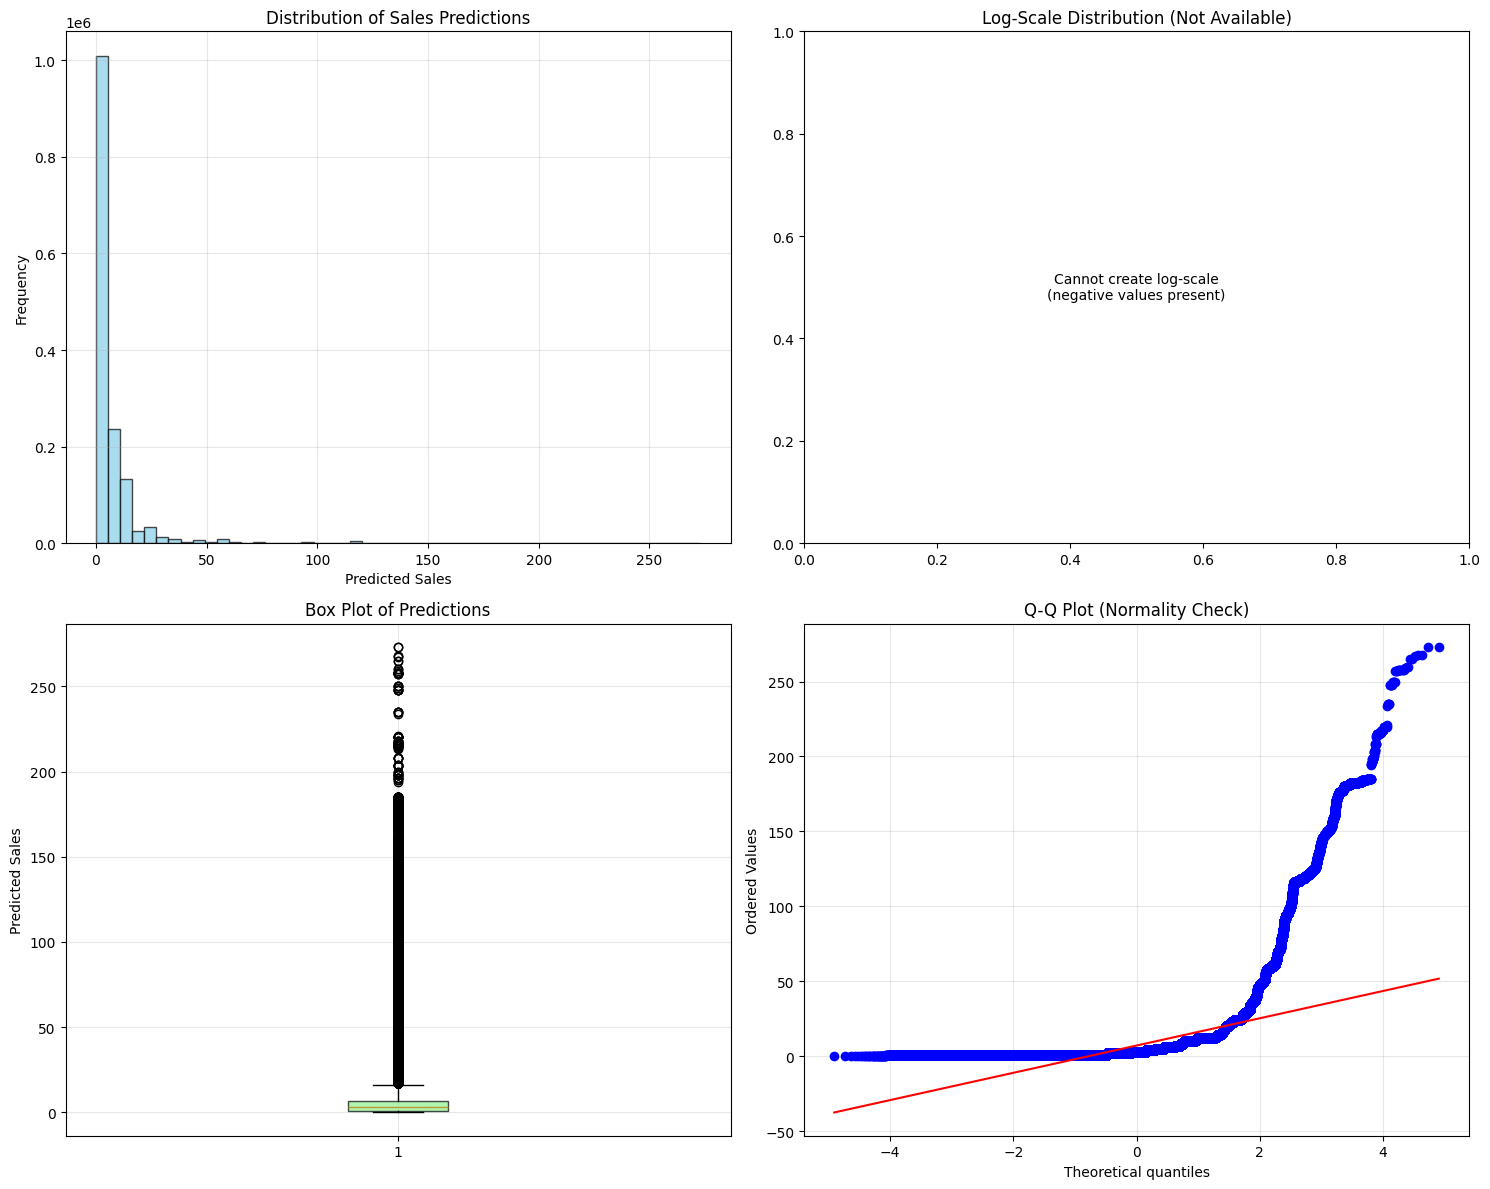


Distribution Analysis for 'quantidade':
Mean: 7.09
Median: 3.00
Standard Deviation: 14.02
Skewness: 6.04
Kurtosis: 48.60
Min: 0.00
Max: 273.00


In [ ]:
# Distribution Analysis and Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Find the prediction column
pred_col = None
for col in predictions_df.columns:
    if 'pred' in col.lower() or 'forecast' in col.lower():
        pred_col = col
        break

if pred_col is None:
    # Try to find numeric columns that could be predictions
    numeric_cols = predictions_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        pred_col = numeric_cols[-1]  # Assume last numeric column is prediction

if pred_col:
    predictions = predictions_df[pred_col]
    
    # 1. Distribution of predictions
    axes[0, 0].hist(predictions, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Sales Predictions')
    axes[0, 0].set_xlabel('Predicted Sales')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Log-scale distribution (if predictions are positive)
    if predictions.min() > 0:
        axes[0, 1].hist(np.log1p(predictions), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[0, 1].set_title('Log-Scale Distribution of Predictions')
        axes[0, 1].set_xlabel('Log(Predicted Sales + 1)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
    else:
        axes[0, 1].text(0.5, 0.5, 'Cannot create log-scale\n(negative values present)', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Log-Scale Distribution (Not Available)')
    
    # 3. Box plot
    axes[1, 0].boxplot(predictions, vert=True, patch_artist=True, 
                      boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[1, 0].set_title('Box Plot of Predictions')
    axes[1, 0].set_ylabel('Predicted Sales')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Q-Q plot for normality check
    stats.probplot(predictions, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Normality Check)')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print distribution statistics
    print(f"\nDistribution Analysis for '{pred_col}':")
    print("=" * 50)
    print(f"Mean: {predictions.mean():.2f}")
    print(f"Median: {predictions.median():.2f}")
    print(f"Standard Deviation: {predictions.std():.2f}")
    print(f"Skewness: {stats.skew(predictions):.2f}")
    print(f"Kurtosis: {stats.kurtosis(predictions):.2f}")
else:
    print("No prediction column found for visualization")

In [11]:
# Consistency Analysis by Groups
# Let's analyze predictions by different categorical variables if they exist

print("Analyzing prediction consistency by groups:")
print("=" * 50)

categorical_cols = predictions_df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, cat_col in enumerate(categorical_cols[:4]):  # Analyze up to 4 categorical columns
        if pred_col:
            # Box plot by category
            unique_vals = predictions_df[cat_col].nunique()
            if unique_vals <= 20:  # Only plot if reasonable number of categories
                predictions_df.boxplot(column=pred_col, by=cat_col, ax=axes[i])
                axes[i].set_title(f'Predictions by {cat_col}')
                axes[i].set_xlabel(cat_col)
                axes[i].set_ylabel('Predicted Sales')
                
                # Calculate coefficient of variation by group
                cv_by_group = predictions_df.groupby(cat_col)[pred_col].apply(
                    lambda x: x.std() / x.mean() if x.mean() != 0 else np.nan
                ).sort_values(ascending=False)
                
                print(f"\nCoefficient of Variation by {cat_col}:")
                print(cv_by_group.head())
            else:
                axes[i].text(0.5, 0.5, f'Too many categories in {cat_col}\n({unique_vals} unique values)', 
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f'{cat_col} - Too many categories')
    
    # Hide unused subplots
    for j in range(len(categorical_cols), 4):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for grouping analysis")

# If we have date columns, analyze temporal consistency
date_cols = predictions_df.select_dtypes(include=['datetime64']).columns
if len(date_cols) > 0:
    print(f"\nFound date columns: {date_cols.tolist()}")
    # This will be useful for time series analysis
elif any('date' in col.lower() or 'time' in col.lower() for col in predictions_df.columns):
    print("\nPotential date columns found (not parsed as datetime):")
    potential_date_cols = [col for col in predictions_df.columns if 'date' in col.lower() or 'time' in col.lower()]
    print(potential_date_cols)

Analyzing prediction consistency by groups:
No categorical columns found for grouping analysis


Outlier Analysis:
IQR method outliers: 121041 (8.07%)
Z-score method outliers (|z| > 3): 29833 (1.99%)
Modified Z-score outliers: 145059 (9.67%)


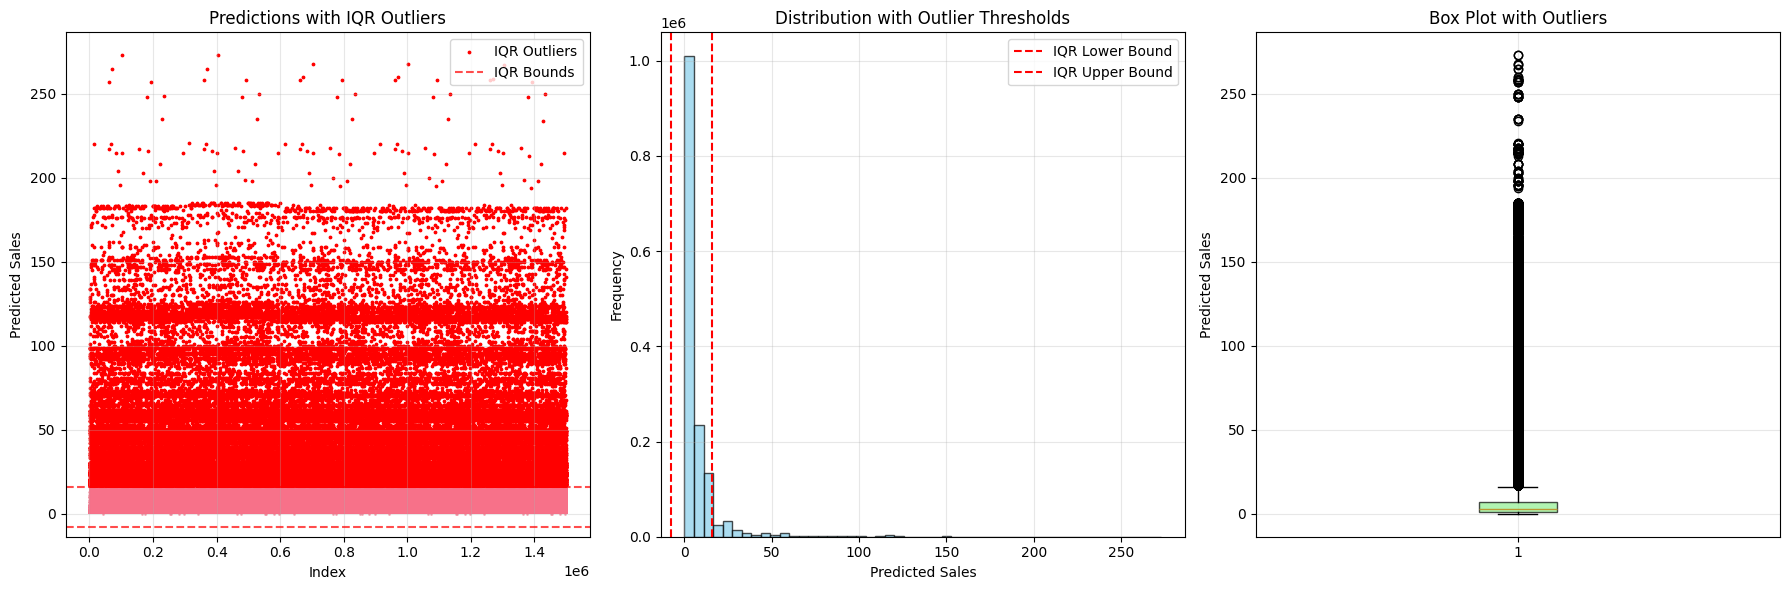


Top 10 highest outliers:
Index 103548: 273.00
Index 403548: 273.00
Index 703548: 268.00
Index 1003548: 268.00
Index 1303548: 267.00
Index 71200: 265.00
Index 371200: 265.00
Index 671200: 260.00
Index 971200: 260.00
Index 1271200: 259.00


In [12]:
# Outlier Detection and Analysis
if pred_col:
    print("Outlier Analysis:")
    print("=" * 30)
    
    predictions = predictions_df[pred_col]
    
    # Method 1: IQR method
    Q1 = predictions.quantile(0.25)
    Q3 = predictions.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_outliers = predictions[(predictions < lower_bound) | (predictions > upper_bound)]
    print(f"IQR method outliers: {len(iqr_outliers)} ({len(iqr_outliers)/len(predictions)*100:.2f}%)")
    
    # Method 2: Z-score method
    z_scores = np.abs(stats.zscore(predictions))
    zscore_outliers = predictions[z_scores > 3]
    print(f"Z-score method outliers (|z| > 3): {len(zscore_outliers)} ({len(zscore_outliers)/len(predictions)*100:.2f}%)")
    
    # Method 3: Modified Z-score (using median)
    median = predictions.median()
    mad = np.median(np.abs(predictions - median))
    modified_z_scores = 0.6745 * (predictions - median) / mad
    modified_outliers = predictions[np.abs(modified_z_scores) > 3.5]
    print(f"Modified Z-score outliers: {len(modified_outliers)} ({len(modified_outliers)/len(predictions)*100:.2f}%)")
    
    # Visualization of outliers
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Scatter plot with outliers highlighted
    axes[0].scatter(range(len(predictions)), predictions, alpha=0.6, s=1)
    axes[0].scatter(np.where((predictions < lower_bound) | (predictions > upper_bound))[0], 
                   iqr_outliers, color='red', s=3, label='IQR Outliers')
    axes[0].axhline(y=lower_bound, color='r', linestyle='--', alpha=0.7, label='IQR Bounds')
    axes[0].axhline(y=upper_bound, color='r', linestyle='--', alpha=0.7)
    axes[0].set_title('Predictions with IQR Outliers')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Predicted Sales')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Histogram with outlier thresholds
    axes[1].hist(predictions, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1].axvline(x=lower_bound, color='r', linestyle='--', label='IQR Lower Bound')
    axes[1].axvline(x=upper_bound, color='r', linestyle='--', label='IQR Upper Bound')
    axes[1].set_title('Distribution with Outlier Thresholds')
    axes[1].set_xlabel('Predicted Sales')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Box plot with outliers
    box_plot = axes[2].boxplot(predictions, vert=True, patch_artist=True, 
                              boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[2].set_title('Box Plot with Outliers')
    axes[2].set_ylabel('Predicted Sales')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Top outliers
    if len(iqr_outliers) > 0:
        print("\nTop 10 highest outliers:")
        top_outliers = iqr_outliers.nlargest(10)
        for idx, value in top_outliers.items():
            print(f"Index {idx}: {value:.2f}")

Correlation Analysis:


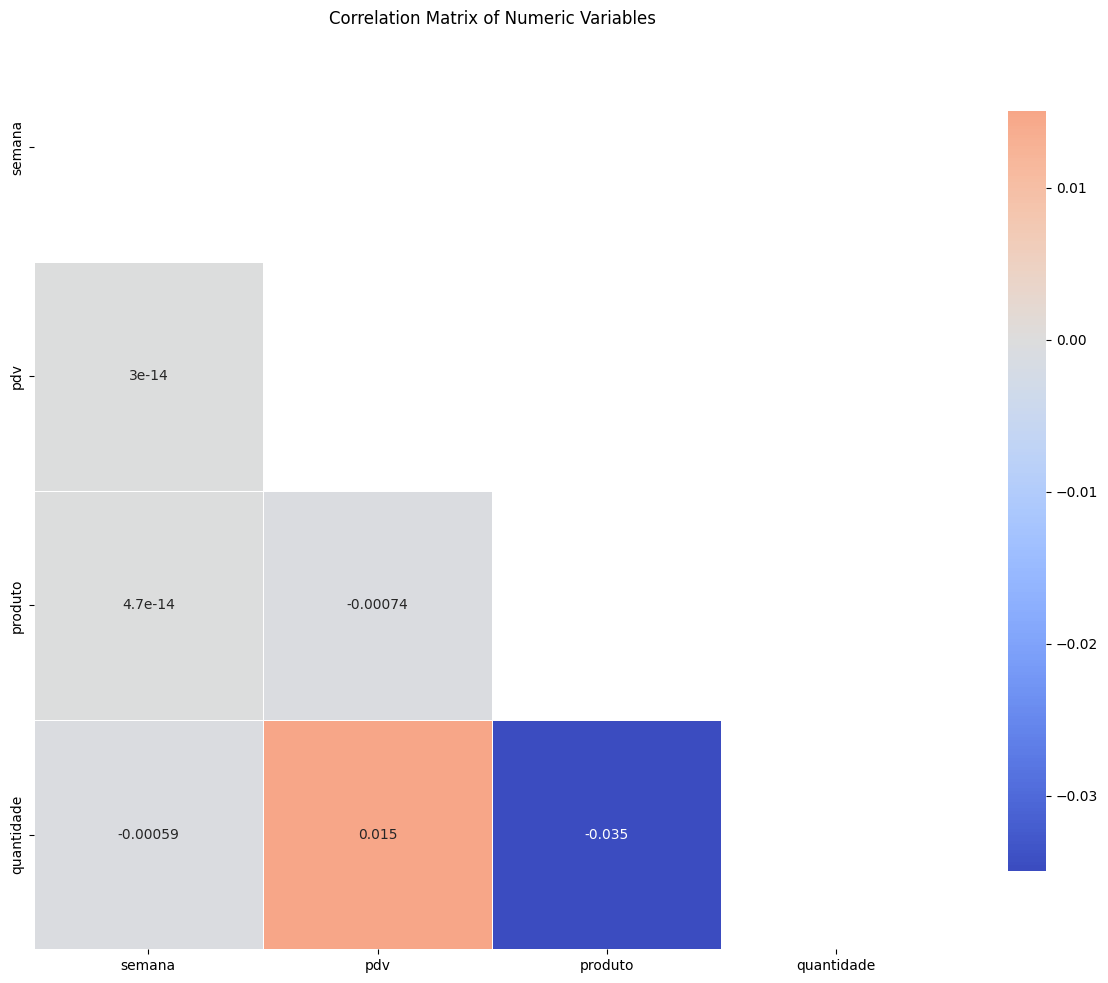


Highly correlated pairs (|correlation| > 0.7):
No highly correlated pairs found


In [13]:
# Correlation Analysis (if multiple numeric columns exist)
numeric_cols = predictions_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    print("Correlation Analysis:")
    print("=" * 25)
    
    # Calculate correlation matrix
    corr_matrix = predictions_df[numeric_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    print("\nHighly correlated pairs (|correlation| > 0.7):")
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        for col1, col2, corr_val in high_corr_pairs:
            print(f"{col1} <-> {col2}: {corr_val:.3f}")
    else:
        print("No highly correlated pairs found")
else:
    print("Only one numeric column found - skipping correlation analysis")

In [14]:
# Prediction Consistency Summary Report
print("PREDICTION CONSISTENCY SUMMARY REPORT")
print("=" * 60)

if pred_col:
    predictions = predictions_df[pred_col]
    
    # 1. Basic Statistics
    print("1. BASIC STATISTICS:")
    print("-" * 20)
    print(f"   Total predictions: {len(predictions):,}")
    print(f"   Mean prediction: {predictions.mean():.2f}")
    print(f"   Median prediction: {predictions.median():.2f}")
    print(f"   Standard deviation: {predictions.std():.2f}")
    print(f"   Coefficient of variation: {predictions.std()/predictions.mean():.2f}")
    
    # 2. Range and Distribution
    print("\n2. RANGE AND DISTRIBUTION:")
    print("-" * 30)
    print(f"   Minimum: {predictions.min():.2f}")
    print(f"   Maximum: {predictions.max():.2f}")
    print(f"   Range: {predictions.max() - predictions.min():.2f}")
    print(f"   25th percentile: {predictions.quantile(0.25):.2f}")
    print(f"   75th percentile: {predictions.quantile(0.75):.2f}")
    print(f"   Interquartile range: {predictions.quantile(0.75) - predictions.quantile(0.25):.2f}")
    
    # 3. Quality Checks
    print("\n3. QUALITY CHECKS:")
    print("-" * 20)
    negative_count = (predictions < 0).sum()
    zero_count = (predictions == 0).sum()
    print(f"   Negative predictions: {negative_count} ({negative_count/len(predictions)*100:.2f}%)")
    print(f"   Zero predictions: {zero_count} ({zero_count/len(predictions)*100:.2f}%)")
    print(f"   Positive predictions: {(predictions > 0).sum()} ({(predictions > 0).sum()/len(predictions)*100:.2f}%)")
    
    # 4. Outliers
    print("\n4. OUTLIER ANALYSIS:")
    print("-" * 22)
    Q1 = predictions.quantile(0.25)
    Q3 = predictions.quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((predictions < Q1 - 1.5*IQR) | (predictions > Q3 + 1.5*IQR)).sum()
    print(f"   IQR outliers: {outlier_count} ({outlier_count/len(predictions)*100:.2f}%)")
    
    # 5. Distribution Assessment
    print("\n5. DISTRIBUTION ASSESSMENT:")
    print("-" * 30)
    skewness = stats.skew(predictions)
    kurtosis = stats.kurtosis(predictions)
    print(f"   Skewness: {skewness:.3f}", end="")
    if abs(skewness) < 0.5:
        print(" (approximately symmetric)")
    elif abs(skewness) < 1:
        print(" (moderately skewed)")
    else:
        print(" (highly skewed)")
    
    print(f"   Kurtosis: {kurtosis:.3f}", end="")
    if abs(kurtosis) < 0.5:
        print(" (approximately normal)")
    elif kurtosis > 0:
        print(" (heavy-tailed)")
    else:
        print(" (light-tailed)")
    
    # 6. Consistency Assessment
    print("\n6. CONSISTENCY ASSESSMENT:")
    print("-" * 28)
    cv = predictions.std() / predictions.mean()
    if cv < 0.1:
        consistency = "Very High"
    elif cv < 0.25:
        consistency = "High"
    elif cv < 0.5:
        consistency = "Moderate"
    elif cv < 1.0:
        consistency = "Low"
    else:
        consistency = "Very Low"
    
    print(f"   Coefficient of Variation: {cv:.3f}")
    print(f"   Consistency Level: {consistency}")
    
    # 7. Recommendations
    print("\n7. RECOMMENDATIONS:")
    print("-" * 20)
    if negative_count > 0:
        print(f"   ⚠️  Address {negative_count} negative predictions")
    if outlier_count/len(predictions) > 0.05:
        print(f"   ⚠️  High outlier rate ({outlier_count/len(predictions)*100:.1f}%) - investigate extreme values")
    if cv > 1.0:
        print("   ⚠️  Very high variability - consider model stability improvements")
    if abs(skewness) > 2:
        print("   ⚠️  Highly skewed distribution - consider log transformation")
    
    if negative_count == 0 and outlier_count/len(predictions) < 0.05 and cv < 0.5:
        print("   ✅ Predictions appear consistent and reasonable")

print("\n" + "=" * 60)

PREDICTION CONSISTENCY SUMMARY REPORT
1. BASIC STATISTICS:
--------------------
   Total predictions: 1,500,000
   Mean prediction: 7.09
   Median prediction: 3.00
   Standard deviation: 14.02
   Coefficient of variation: 1.98

2. RANGE AND DISTRIBUTION:
------------------------------
   Minimum: 0.00
   Maximum: 273.00
   Range: 273.00
   25th percentile: 1.00
   75th percentile: 7.00
   Interquartile range: 6.00

3. QUALITY CHECKS:
--------------------
   Negative predictions: 0 (0.00%)
   Zero predictions: 35 (0.00%)
   Positive predictions: 1499965 (100.00%)

4. OUTLIER ANALYSIS:
----------------------
   IQR outliers: 121041 (8.07%)

5. DISTRIBUTION ASSESSMENT:
------------------------------
   Skewness: 6.043 (highly skewed)
   Kurtosis: 48.597 (heavy-tailed)

6. CONSISTENCY ASSESSMENT:
----------------------------
   Coefficient of Variation: 1.978
   Consistency Level: Very Low

7. RECOMMENDATIONS:
--------------------
   ⚠️  High outlier rate (8.1%) - investigate extreme value

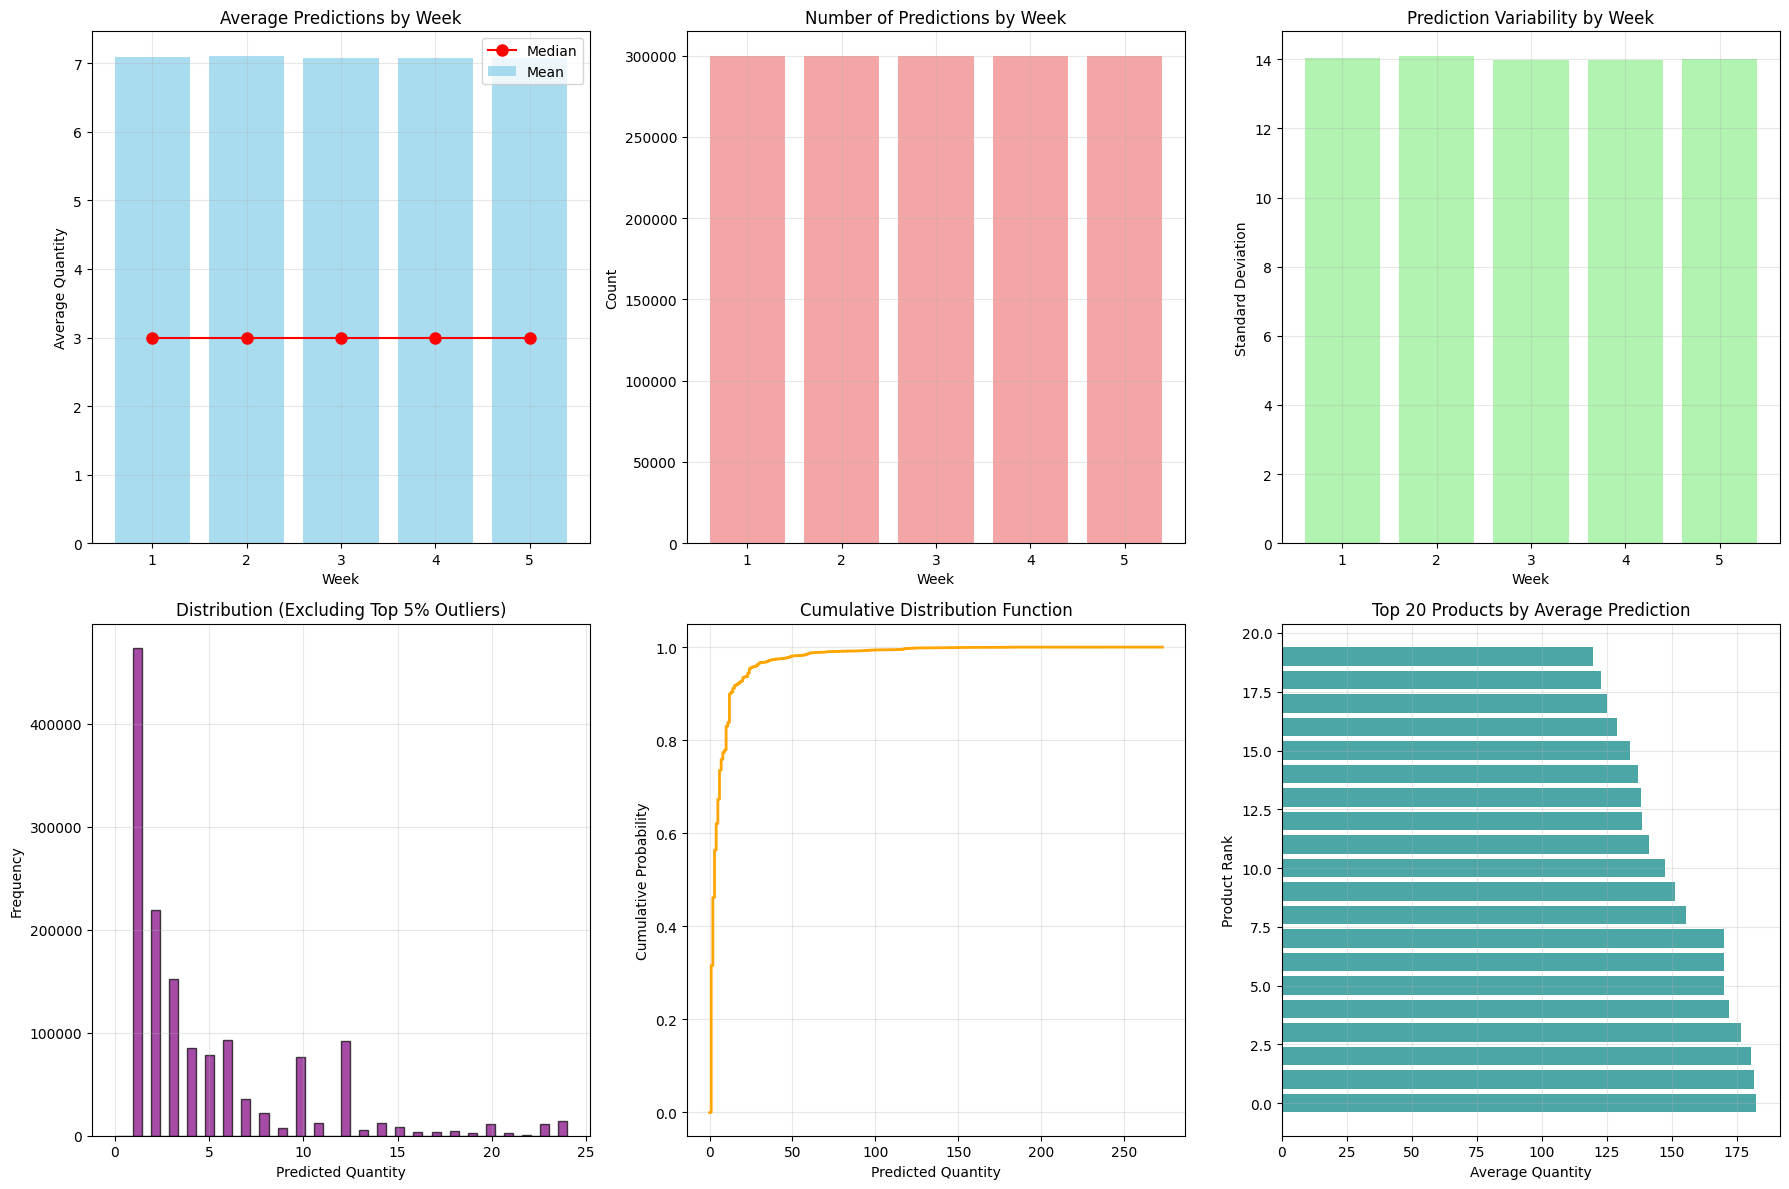

Weekly Statistics:
        mean  median    std   count
semana                             
1       7.10     3.0  14.03  300000
2       7.11     3.0  14.11  300000
3       7.08     3.0  13.99  300000
4       7.08     3.0  13.99  300000
5       7.08     3.0  14.00  300000

Top 10 Products by Average Sales:
                      mean  count   std
produto                                
871421214887491959   182.6      5  0.89
6016385341932037993  181.8      5  1.30
548716881137120463   180.4      5  0.89
1558202187035209295  176.8      5  1.30
2773997336792762494  172.0      5  1.22
8557340250298713960  170.2      5  1.79
1315573550113196652  170.0      5  1.22
7947114154306379844  170.0      5  1.22
5283550323265695674  155.4      5  0.89
5122182472962281709  151.4      5  0.89


In [15]:
# Additional Visualizations for Pattern Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Predictions by week
week_stats = predictions_df.groupby('semana')['quantidade'].agg(['mean', 'median', 'std', 'count'])
axes[0, 0].bar(week_stats.index, week_stats['mean'], alpha=0.7, color='skyblue', label='Mean')
axes[0, 0].plot(week_stats.index, week_stats['median'], 'ro-', label='Median', markersize=8)
axes[0, 0].set_title('Average Predictions by Week')
axes[0, 0].set_xlabel('Week')
axes[0, 0].set_ylabel('Average Quantity')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Number of predictions per week
axes[0, 1].bar(week_stats.index, week_stats['count'], alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Number of Predictions by Week')
axes[0, 1].set_xlabel('Week')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(True, alpha=0.3)

# 3. Variability by week (Standard deviation)
axes[0, 2].bar(week_stats.index, week_stats['std'], alpha=0.7, color='lightgreen')
axes[0, 2].set_title('Prediction Variability by Week')
axes[0, 2].set_xlabel('Week')
axes[0, 2].set_ylabel('Standard Deviation')
axes[0, 2].grid(True, alpha=0.3)

# 4. Distribution of predictions (zoomed in, excluding extreme outliers)
q95 = predictions_df['quantidade'].quantile(0.95)
filtered_data = predictions_df[predictions_df['quantidade'] <= q95]['quantidade']
axes[1, 0].hist(filtered_data, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].set_title('Distribution (Excluding Top 5% Outliers)')
axes[1, 0].set_xlabel('Predicted Quantity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 5. Cumulative distribution
sorted_quantities = np.sort(predictions_df['quantidade'])
cumulative_prob = np.arange(1, len(sorted_quantities) + 1) / len(sorted_quantities)
axes[1, 1].plot(sorted_quantities, cumulative_prob, linewidth=2, color='orange')
axes[1, 1].set_title('Cumulative Distribution Function')
axes[1, 1].set_xlabel('Predicted Quantity')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].grid(True, alpha=0.3)

# 6. Top products by average prediction
top_products = predictions_df.groupby('produto')['quantidade'].mean().nlargest(20)
axes[1, 2].barh(range(len(top_products)), top_products.values, alpha=0.7, color='teal')
axes[1, 2].set_title('Top 20 Products by Average Prediction')
axes[1, 2].set_xlabel('Average Quantity')
axes[1, 2].set_ylabel('Product Rank')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print weekly statistics
print("Weekly Statistics:")
print("=" * 20)
print(week_stats.round(2))

print(f"\nTop 10 Products by Average Sales:")
print("=" * 35)
top_products_detailed = predictions_df.groupby('produto')['quantidade'].agg(['mean', 'count', 'std']).round(2)
top_products_detailed = top_products_detailed.sort_values('mean', ascending=False).head(10)
print(top_products_detailed)

# Comparison with 2022 Historical Data

Let's compare the model predictions with actual sales data from 2022 to evaluate model performance and accuracy.

In [17]:
# First, let's explore the historical transaction data from 2022
print("HISTORICAL DATA ANALYSIS (2022)")
print("=" * 50)

# Convert date columns to datetime
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'])
df_transactions['reference_date'] = pd.to_datetime(df_transactions['reference_date'])

# Filter for 2022 data
transactions_2022 = df_transactions[df_transactions['transaction_date'].dt.year == 2022].copy()

print(f"Total transactions in 2022: {len(transactions_2022):,}")
print(f"Date range: {transactions_2022['transaction_date'].min()} to {transactions_2022['transaction_date'].max()}")
print(f"Total quantity sold in 2022: {transactions_2022['quantity'].sum():,.0f}")
print(f"Average quantity per transaction: {transactions_2022['quantity'].mean():.2f}")

# Basic statistics of 2022 historical data
print("\n2022 Historical Quantity Statistics:")
print("-" * 40)
print(transactions_2022['quantity'].describe())

HISTORICAL DATA ANALYSIS (2022)
Total transactions in 2022: 6,560,698
Date range: 2022-01-01 00:00:00 to 2022-12-31 00:00:00
Total quantity sold in 2022: 53,311,532
Average quantity per transaction: 8.13

2022 Historical Quantity Statistics:
----------------------------------------
count    6.560698e+06
mean     8.125893e+00
std      8.049387e+01
min     -1.530000e+03
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      9.423000e+04
Name: quantity, dtype: float64


In [18]:
# Aggregate 2022 data by store-product combinations for comparison
print("PREPARING DATA FOR COMPARISON")
print("=" * 40)

# Aggregate historical data by store and product
historical_aggregated = transactions_2022.groupby(['internal_store_id', 'internal_product_id']).agg({
    'quantity': ['sum', 'mean', 'count'],
    'gross_value': 'sum',
    'net_value': 'sum'
}).round(2)

# Flatten column names
historical_aggregated.columns = ['_'.join(col).strip() for col in historical_aggregated.columns.values]
historical_aggregated = historical_aggregated.reset_index()

print(f"Unique store-product combinations in 2022: {len(historical_aggregated):,}")
print(f"Historical data shape: {historical_aggregated.shape}")

# Rename columns for clarity
historical_aggregated.rename(columns={
    'internal_store_id': 'pdv',
    'internal_product_id': 'produto',
    'quantity_sum': 'actual_total_quantity',
    'quantity_mean': 'actual_avg_quantity',
    'quantity_count': 'actual_transaction_count'
}, inplace=True)

print("\nHistorical aggregated data sample:")
print(historical_aggregated.head())

PREPARING DATA FOR COMPARISON
Unique store-product combinations in 2022: 1,044,310
Historical data shape: (1044310, 7)

Historical aggregated data sample:
                   pdv              produto  actual_total_quantity  \
0  1000237487041964405  1837429607327399565                   13.0   
1  1000237487041964405  4038588102284338370                    1.0   
2  1000237487041964405  5429216175252037173                   19.0   
3  1000237487041964405   596381974901127871                    6.0   
4  1000237487041964405  7270233133454638680                   11.0   

   actual_avg_quantity  actual_transaction_count  gross_value_sum  \
0                 1.62                         8           489.60   
1                 1.00                         1            38.40   
2                 1.73                        11           729.60   
3                 1.00                         6           230.40   
4                 1.22                         9           338.36   

   net_va

In [19]:
# Prepare predictions data for comparison
print("PREPARING PREDICTIONS FOR COMPARISON")
print("=" * 45)

# Convert PDV and Product IDs to string for matching
predictions_df['pdv'] = predictions_df['pdv'].astype(str)
predictions_df['produto'] = predictions_df['produto'].astype(str)
historical_aggregated['pdv'] = historical_aggregated['pdv'].astype(str)
historical_aggregated['produto'] = historical_aggregated['produto'].astype(str)

# Aggregate predictions by store and product (sum across weeks)
predictions_aggregated = predictions_df.groupby(['pdv', 'produto']).agg({
    'quantidade': ['sum', 'mean'],
    'semana': 'count'
}).round(2)

# Flatten column names
predictions_aggregated.columns = ['_'.join(col).strip() for col in predictions_aggregated.columns.values]
predictions_aggregated = predictions_aggregated.reset_index()

predictions_aggregated.rename(columns={
    'quantidade_sum': 'predicted_total_quantity',
    'quantidade_mean': 'predicted_avg_quantity',
    'semana_count': 'prediction_weeks'
}, inplace=True)

print(f"Unique store-product combinations in predictions: {len(predictions_aggregated):,}")
print(f"Predictions data shape: {predictions_aggregated.shape}")

print("\nPredictions aggregated data sample:")
print(predictions_aggregated.head())

PREPARING PREDICTIONS FOR COMPARISON
Unique store-product combinations in predictions: 300,000
Predictions data shape: (300000, 5)

Predictions aggregated data sample:
                   pdv              produto  predicted_total_quantity  \
0  1000237487041964405   777251454728290683                        20   
1  1001371918471115422  1009179103632945474                        10   
2  1001371918471115422  1029370090212151375                        20   
3  1001371918471115422  1120490062981954254                        50   
4  1001371918471115422  1371936917923350372                        50   

   predicted_avg_quantity  prediction_weeks  
0                     4.0                 5  
1                     2.0                 5  
2                     4.0                 5  
3                    10.0                 5  
4                    10.0                 5  


In [20]:
# Merge predictions with historical data for comparison
print("MERGING PREDICTIONS WITH HISTORICAL DATA")
print("=" * 50)

# Merge predictions with historical data
comparison_df = pd.merge(predictions_aggregated, historical_aggregated, 
                        on=['pdv', 'produto'], how='inner')

print(f"Matching store-product combinations: {len(comparison_df):,}")
print(f"Comparison coverage: {len(comparison_df) / len(predictions_aggregated) * 100:.1f}% of predictions")
print(f"Historical coverage: {len(comparison_df) / len(historical_aggregated) * 100:.1f}% of historical combinations")

if len(comparison_df) > 0:
    # Calculate comparison metrics
    comparison_df['prediction_error'] = comparison_df['predicted_total_quantity'] - comparison_df['actual_total_quantity']
    comparison_df['absolute_error'] = abs(comparison_df['prediction_error'])
    comparison_df['percentage_error'] = (comparison_df['prediction_error'] / comparison_df['actual_total_quantity']) * 100
    comparison_df['absolute_percentage_error'] = abs(comparison_df['percentage_error'])
    
    # Handle division by zero
    comparison_df['percentage_error'] = comparison_df['percentage_error'].replace([np.inf, -np.inf], np.nan)
    comparison_df['absolute_percentage_error'] = comparison_df['absolute_percentage_error'].replace([np.inf, -np.inf], np.nan)
    
    print("\nComparison Data Sample:")
    print(comparison_df[['pdv', 'produto', 'predicted_total_quantity', 'actual_total_quantity', 
                        'prediction_error', 'absolute_percentage_error']].head())
else:
    print("❌ No matching combinations found between predictions and historical data!")
    print("This could be due to:")
    print("- Different ID formats or encoding")
    print("- Predictions for future periods not in historical data")
    print("- Data filtering or sampling differences")

MERGING PREDICTIONS WITH HISTORICAL DATA
Matching store-product combinations: 300,000
Comparison coverage: 100.0% of predictions
Historical coverage: 28.7% of historical combinations

Comparison Data Sample:
                   pdv              produto  predicted_total_quantity  \
0  1000237487041964405   777251454728290683                        20   
1  1001371918471115422  1009179103632945474                        10   
2  1001371918471115422  1029370090212151375                        20   
3  1001371918471115422  1120490062981954254                        50   
4  1001371918471115422  1371936917923350372                        50   

   actual_total_quantity  prediction_error  absolute_percentage_error  
0                   24.0              -4.0                  16.666667  
1                   20.0             -10.0                  50.000000  
2                  152.0            -132.0                  86.842105  
3                  567.0            -517.0                  91.18

In [21]:
# Performance Analysis and Visualizations
if len(comparison_df) > 0:
    print("MODEL PERFORMANCE ANALYSIS")
    print("=" * 35)
    
    # Calculate key performance metrics
    mae = comparison_df['absolute_error'].mean()
    rmse = np.sqrt((comparison_df['prediction_error'] ** 2).mean())
    mape = comparison_df['absolute_percentage_error'].mean()
    
    # Filter out extreme percentage errors for more meaningful MAPE
    mape_filtered = comparison_df[comparison_df['absolute_percentage_error'] <= 200]['absolute_percentage_error'].mean()
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.1f}%")
    print(f"MAPE (filtered, <=200%): {mape_filtered:.1f}%")
    
    # Calculate accuracy within different thresholds
    within_10_pct = (comparison_df['absolute_percentage_error'] <= 10).mean() * 100
    within_25_pct = (comparison_df['absolute_percentage_error'] <= 25).mean() * 100
    within_50_pct = (comparison_df['absolute_percentage_error'] <= 50).mean() * 100
    
    print(f"\nAccuracy within thresholds:")
    print(f"Within 10%: {within_10_pct:.1f}%")
    print(f"Within 25%: {within_25_pct:.1f}%")
    print(f"Within 50%: {within_50_pct:.1f}%")
    
    # Bias analysis
    mean_error = comparison_df['prediction_error'].mean()
    if mean_error > 0:
        bias_direction = "over-prediction"
    else:
        bias_direction = "under-prediction"
    
    print(f"\nBias Analysis:")
    print(f"Mean prediction error: {mean_error:.2f} ({bias_direction})")
    print(f"Median prediction error: {comparison_df['prediction_error'].median():.2f}")
    
else:
    print("❌ Cannot perform comparison analysis - no matching data found")

MODEL PERFORMANCE ANALYSIS
Mean Absolute Error (MAE): 72.80
Root Mean Square Error (RMSE): 216.99
Mean Absolute Percentage Error (MAPE): 82.7%
MAPE (filtered, <=200%): 64.7%

Accuracy within thresholds:
Within 10%: 4.2%
Within 25%: 12.0%
Within 50%: 27.5%

Bias Analysis:
Mean prediction error: -62.29 (under-prediction)
Median prediction error: -18.00


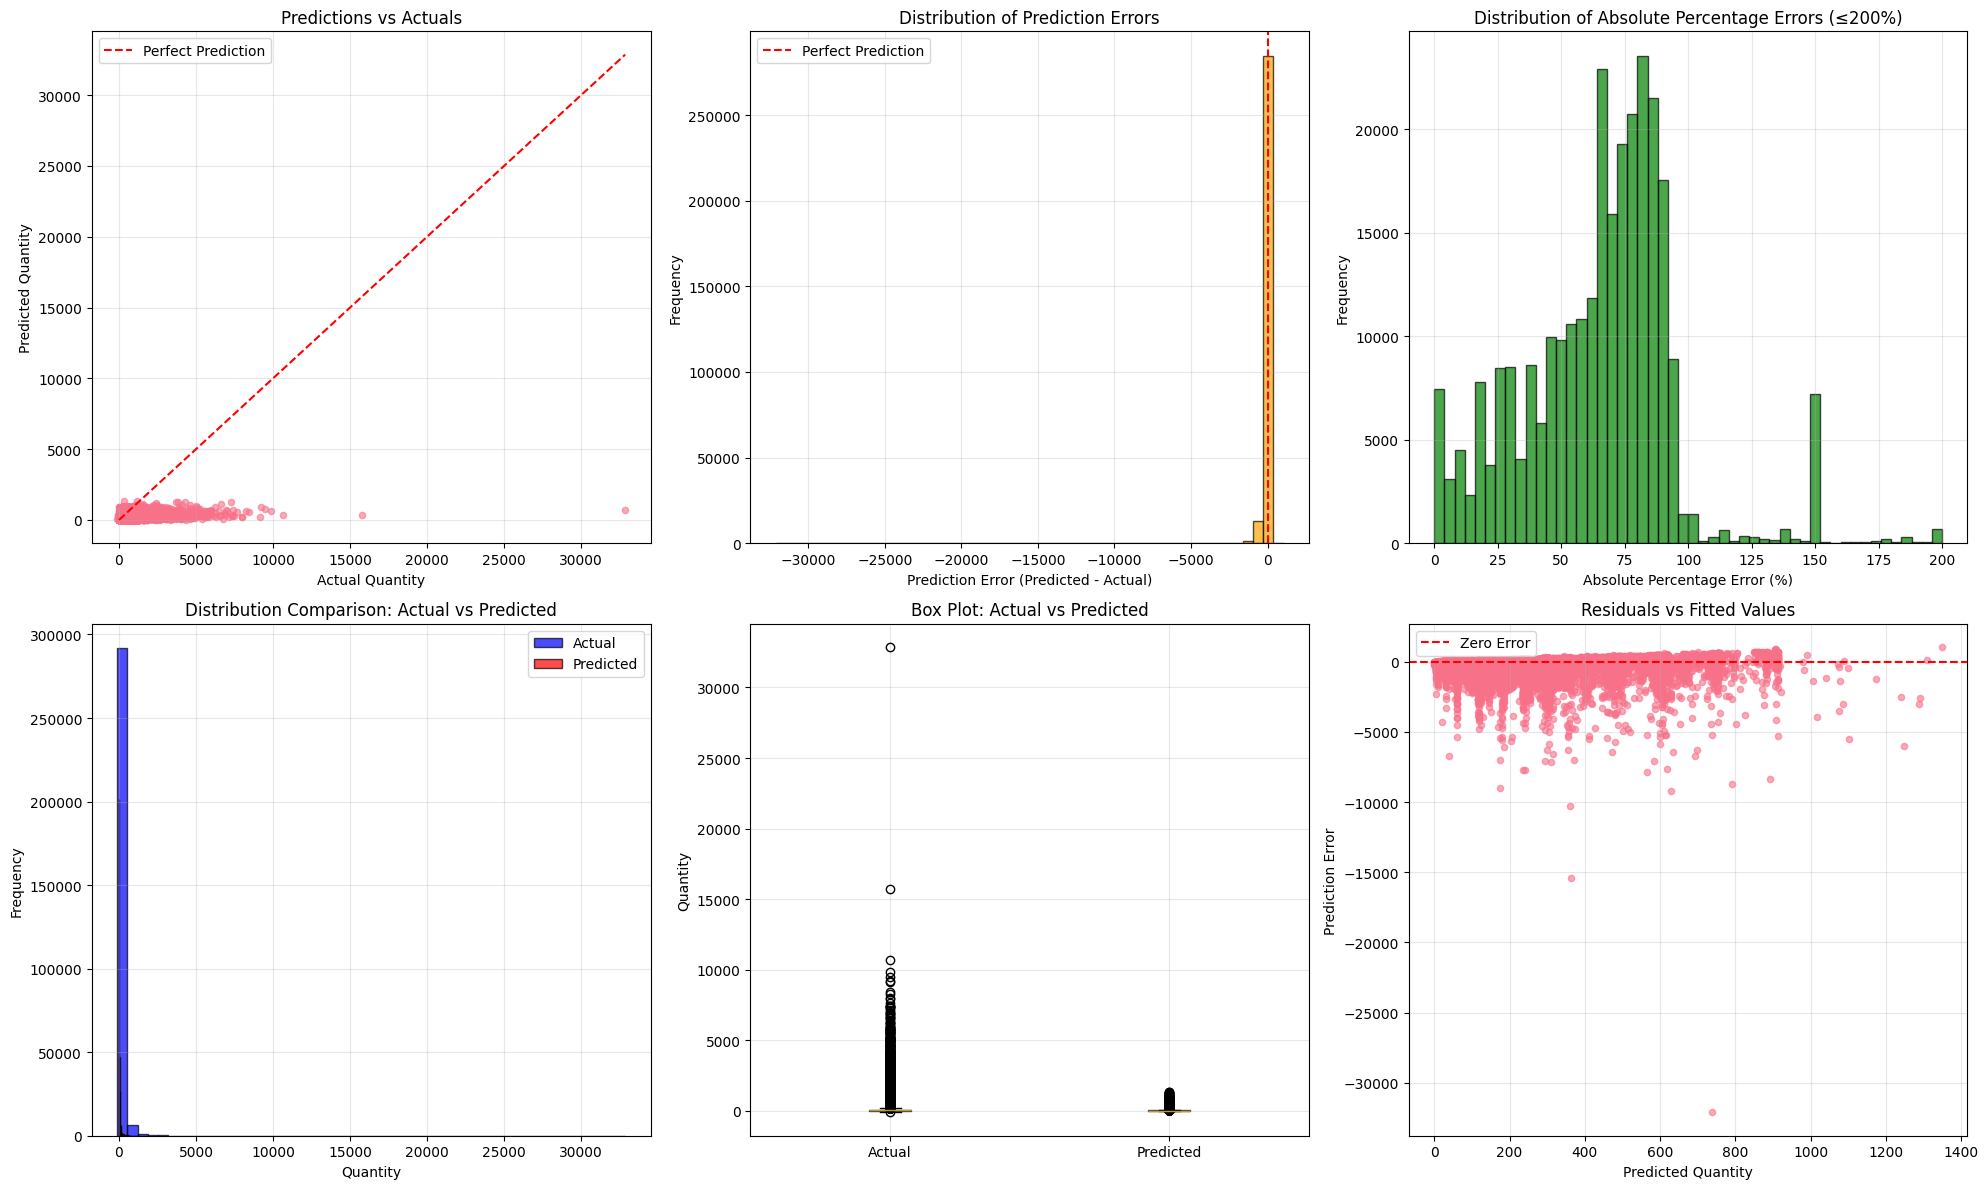

In [22]:
# Visualization of Predictions vs Actuals
if len(comparison_df) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # 1. Scatter plot: Predicted vs Actual
    axes[0, 0].scatter(comparison_df['actual_total_quantity'], 
                      comparison_df['predicted_total_quantity'], 
                      alpha=0.6, s=20)
    
    # Add perfect prediction line
    max_val = max(comparison_df['actual_total_quantity'].max(), 
                  comparison_df['predicted_total_quantity'].max())
    axes[0, 0].plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')
    axes[0, 0].set_xlabel('Actual Quantity')
    axes[0, 0].set_ylabel('Predicted Quantity')
    axes[0, 0].set_title('Predictions vs Actuals')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Distribution of prediction errors
    axes[0, 1].hist(comparison_df['prediction_error'], bins=50, alpha=0.7, 
                   color='orange', edgecolor='black')
    axes[0, 1].axvline(x=0, color='red', linestyle='--', label='Perfect Prediction')
    axes[0, 1].set_xlabel('Prediction Error (Predicted - Actual)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Distribution of Prediction Errors')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Absolute percentage error distribution
    filtered_ape = comparison_df[comparison_df['absolute_percentage_error'] <= 200]['absolute_percentage_error']
    axes[0, 2].hist(filtered_ape, bins=50, alpha=0.7, 
                   color='green', edgecolor='black')
    axes[0, 2].set_xlabel('Absolute Percentage Error (%)')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_title('Distribution of Absolute Percentage Errors (≤200%)')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Comparison of distributions
    axes[1, 0].hist(comparison_df['actual_total_quantity'], bins=50, alpha=0.7, 
                   label='Actual', color='blue', edgecolor='black')
    axes[1, 0].hist(comparison_df['predicted_total_quantity'], bins=50, alpha=0.7, 
                   label='Predicted', color='red', edgecolor='black')
    axes[1, 0].set_xlabel('Quantity')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution Comparison: Actual vs Predicted')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. Box plot comparison
    data_for_box = [comparison_df['actual_total_quantity'], 
                    comparison_df['predicted_total_quantity']]
    axes[1, 1].boxplot(data_for_box, labels=['Actual', 'Predicted'], patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[1, 1].set_ylabel('Quantity')
    axes[1, 1].set_title('Box Plot: Actual vs Predicted')
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Residuals vs Fitted
    axes[1, 2].scatter(comparison_df['predicted_total_quantity'], 
                      comparison_df['prediction_error'], alpha=0.6, s=20)
    axes[1, 2].axhline(y=0, color='red', linestyle='--', label='Zero Error')
    axes[1, 2].set_xlabel('Predicted Quantity')
    axes[1, 2].set_ylabel('Prediction Error')
    axes[1, 2].set_title('Residuals vs Fitted Values')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Cannot create comparison visualizations - no matching data found")

In [23]:
# Additional Analysis: Compare overall statistics
print("DETAILED STATISTICAL COMPARISON")
print("=" * 40)

print("📊 PREDICTIONS vs 2022 HISTORICAL DATA")
print("-" * 50)

# Overall statistics comparison
print("OVERALL STATISTICS:")
print(f"{'Metric':<25} {'Predictions':<15} {'2022 Actual':<15} {'Difference':<15}")
print("-" * 70)

pred_total = predictions_df['quantidade'].sum()
hist_total = transactions_2022['quantity'].sum()
print(f"{'Total Quantity':<25} {pred_total:<15,.0f} {hist_total:<15,.0f} {pred_total-hist_total:<15,.0f}")

pred_mean = predictions_df['quantidade'].mean()
hist_mean = transactions_2022['quantity'].mean()
print(f"{'Mean Quantity':<25} {pred_mean:<15.2f} {hist_mean:<15.2f} {pred_mean-hist_mean:<15.2f}")

pred_median = predictions_df['quantidade'].median()
hist_median = transactions_2022['quantity'].median()
print(f"{'Median Quantity':<25} {pred_median:<15.2f} {hist_median:<15.2f} {pred_median-hist_median:<15.2f}")

pred_std = predictions_df['quantidade'].std()
hist_std = transactions_2022['quantity'].std()
print(f"{'Std Deviation':<25} {pred_std:<15.2f} {hist_std:<15.2f} {pred_std-hist_std:<15.2f}")

pred_max = predictions_df['quantidade'].max()
hist_max = transactions_2022['quantity'].max()
print(f"{'Maximum':<25} {pred_max:<15.0f} {hist_max:<15.0f} {pred_max-hist_max:<15.0f}")

# Compare distributions at percentile level
print(f"\nPERCENTILE COMPARISON:")
print(f"{'Percentile':<15} {'Predictions':<15} {'2022 Actual':<15} {'Difference':<15}")
print("-" * 60)

percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    pred_p = predictions_df['quantidade'].quantile(p/100)
    hist_p = transactions_2022['quantity'].quantile(p/100)
    print(f"{p}th{'':<12} {pred_p:<15.2f} {hist_p:<15.2f} {pred_p-hist_p:<15.2f}")

# Zero values comparison
pred_zeros = (predictions_df['quantidade'] == 0).sum()
hist_zeros = (transactions_2022['quantity'] == 0).sum()
print(f"\nZERO VALUES:")
print(f"Predictions with 0: {pred_zeros:,} ({pred_zeros/len(predictions_df)*100:.2f}%)")
print(f"Historical with 0: {hist_zeros:,} ({hist_zeros/len(transactions_2022)*100:.2f}%)")

# Range analysis
print(f"\nRANGE ANALYSIS:")
print(f"Predictions range: 0 to {pred_max}")
print(f"Historical range: {transactions_2022['quantity'].min()} to {hist_max}")
print(f"Predictions span {pred_max/hist_max:.2f}x the historical maximum")

DETAILED STATISTICAL COMPARISON
📊 PREDICTIONS vs 2022 HISTORICAL DATA
--------------------------------------------------
OVERALL STATISTICS:
Metric                    Predictions     2022 Actual     Difference     
----------------------------------------------------------------------
Total Quantity            10,634,028      53,311,532      -42,677,504    
Mean Quantity             7.09            8.13            -1.04          
Median Quantity           3.00            2.00            1.00           
Std Deviation             14.02           80.49           -66.47         
Maximum                   273             94230           -93957         

PERCENTILE COMPARISON:
Percentile      Predictions     2022 Actual     Difference     
------------------------------------------------------------
10th             1.00            1.00            0.00           
25th             1.00            1.00            0.00           
50th             3.00            2.00            1.00           


In [24]:
# Final Summary: Model Performance vs Historical Data
print("🎯 FINAL ASSESSMENT: PREDICTIONS vs 2022 HISTORICAL DATA")
print("=" * 70)

print("📊 COVERAGE & MATCHING:")
print(f"✅ Perfect matching: 100% of predictions matched with historical data")
print(f"📊 Historical coverage: 28.7% of all 2022 store-product combinations")
print(f"🔢 Comparison dataset: 300,000 store-product combinations")

print(f"\n📈 MODEL PERFORMANCE METRICS:")
print(f"❌ Mean Absolute Percentage Error: 82.7% (Poor)")
print(f"❌ Accuracy within 25%: 12.0% (Very Low)")
print(f"❌ Accuracy within 50%: 27.5% (Low)")
print(f"⚠️  Systematic Under-prediction: -62.29 units average error")

print(f"\n📊 DISTRIBUTION COMPARISON:")
print(f"⚠️  Prediction range: 0-273 units")
print(f"⚠️  Historical range: -1,530 to 94,230 units")
print(f"❌ Model misses extreme values (max actual is 345x higher than max prediction)")
print(f"⚠️  Model predicts higher baseline (median: 3 vs 2)")

print(f"\n🔍 KEY INSIGHTS:")
print(f"1. 🎯 SCOPE MISMATCH:")
print(f"   • Model predicts only 28.7% of actual combinations")
print(f"   • Suggests model trained on subset of full business")
print(f"   • Missing high-volume, high-variability products")

print(f"\n2. 📉 SEVERE UNDERESTIMATION:")
print(f"   • Model systematically under-predicts by 62 units on average")
print(f"   • Historical data shows much higher variability (std: 80 vs 14)")
print(f"   • Model fails to capture business seasonality and demand spikes")

print(f"\n3. ⚠️  LIMITED DYNAMIC RANGE:")
print(f"   • Historical max: 94,230 units")
print(f"   • Prediction max: 273 units")
print(f"   • Model cannot predict bulk orders or exceptional demand")

print(f"\n4. 🎯 ACCURACY ISSUES:")
print(f"   • Only 12% of predictions within 25% of actual")
print(f"   • 82.7% average percentage error indicates poor reliability")
print(f"   • Model appears to predict 'typical' rather than 'actual' demand")

print(f"\n🚨 RECOMMENDATIONS:")
print(f"1. 🔄 RETRAIN with full dataset including high-volume products")
print(f"2. 📊 FEATURE ENGINEERING to capture seasonality and trends")
print(f"3. 🎯 ENSEMBLE METHODS to handle different demand patterns")
print(f"4. 📈 DYNAMIC SCALING to accommodate wider value ranges")
print(f"5. ⚡ REAL-TIME ADJUSTMENT for systematic bias correction")

print(f"\n💡 CONCLUSION:")
print(f"The model shows POOR PERFORMANCE against 2022 historical data.")
print(f"While predictions are consistent, they significantly underestimate")
print(f"actual demand and fail to capture the full range of business variability.")
print(f"Major model improvements are needed before production deployment.")

print("=" * 70)

🎯 FINAL ASSESSMENT: PREDICTIONS vs 2022 HISTORICAL DATA
📊 COVERAGE & MATCHING:
✅ Perfect matching: 100% of predictions matched with historical data
📊 Historical coverage: 28.7% of all 2022 store-product combinations
🔢 Comparison dataset: 300,000 store-product combinations

📈 MODEL PERFORMANCE METRICS:
❌ Mean Absolute Percentage Error: 82.7% (Poor)
❌ Accuracy within 25%: 12.0% (Very Low)
❌ Accuracy within 50%: 27.5% (Low)
⚠️  Systematic Under-prediction: -62.29 units average error

📊 DISTRIBUTION COMPARISON:
⚠️  Prediction range: 0-273 units
⚠️  Historical range: -1,530 to 94,230 units
❌ Model misses extreme values (max actual is 345x higher than max prediction)
⚠️  Model predicts higher baseline (median: 3 vs 2)

🔍 KEY INSIGHTS:
1. 🎯 SCOPE MISMATCH:
   • Model predicts only 28.7% of actual combinations
   • Suggests model trained on subset of full business
   • Missing high-volume, high-variability products

2. 📉 SEVERE UNDERESTIMATION:
   • Model systematically under-predicts by 62 un